# Soils4Africa: Building ML models from MIR data to predict soil properties

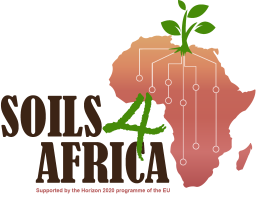

# Introduction

This script is dedicated in explaining the Machine Learning pipeline commonly employed in soil spectroscopy, where the goal is to predict the soil properties from the spectral data.

To this end, we employ the spectraxai library, a recently developed spectra processing package that will be open-sourced. 

Spectraxai is a package that aims to process input spectra with user-based choices and export useful information of various aspects:
* Visualize the spectra.
* Transform spectra with various preprocessings.
* Train Machine Learning models to predict several soil properties.
* Explainability of the methods used.

In this script, we aim to introduce the spectraxai's main components and utilizations in three distinct levels of familiarization:

* Begginer Level
* Intermediate Level
* Expert Level

## Dataset

Data from the Soils4Africa will become public after the 1st of September 2025.

Use the following variables to toggle on and off. You will have to specify the endpoints of the public repositories as well.

In [1]:
USE_FULL_PUBLIC_DATASET = False

# PUBLIC ENDPOINTS
URL_PHYS_CHEM_WC = "TO_REPLACE_WHEN_FULL_DATA_ARE_PUBLIC"
URL_SPC          = "TO_REPLACE_WHEN_FULL_DATA_ARE_PUBLIC"

### Retrieving from public repository (available after the 1st of September 2025)

Soil data can be retrieved from the Soils4Africa AfricaSIS: https://africasis.isric.org/

We will download them as CSV files and include a timestamp to the file. 

The provided links are **persistent**, meaning they will always be available at the same URLs. However, the **content is dynamic**—each download reflects the most up-to-date version of the database.  

Whenever new data is ingested into the database, the downloadable tables are **automatically updated** and overwritten. This means that previously downloaded files may no longer match future versions.  

To ensure reproducibility, it is essential to keep track of the **download date** as a version reference when saving the data.

In [2]:
import requests
import zipfile
import datetime
import os
from io import BytesIO

if USE_FULL_PUBLIC_DATASET:
    
    # Get the current UTC timestamp
    timestamp = datetime.datetime.now(datetime.UTC).strftime("%Y%m%dT%H%M%SZ")  # Example: 20250331T123456Z
    print("Current UTC timestamp:", timestamp)
    
    # List of (name, URL) tuples
    files = [
        ("specimen_phys_chem_wc", URL_PHYS_CHEM_WC),
        ("spectral_data_all_countries", URL_SPC)
    ]
    
    # Download files using requests
    for filename, url in files:
        print(f"Downloading {filename}")
    
        response = requests.get(url)
        response.raise_for_status()  # Raise an error if download fails
    
        if "specimen_phys_chem_wc" in filename:
            with zipfile.ZipFile(BytesIO(response.content)) as zip_ref:
                zip_ref.extractall(f"{filename}_{timestamp}_extracted")  # Extract to a folder
            print(f"Extracted files from {filename}.zip")
            
        else:        
            with open(f"{filename}_{timestamp}.csv", "w", encoding="utf-8") as f:
                f.write(response.text)
            
            print(f"Downloaded {filename}")
    
    
    # Update with timestamped filenames
    files = [
        f"specimen_phys_chem_wc_{timestamp}_extracted/specimen_phys_chem_wc.csv",
        f"spectral_data_all_countries_{timestamp}.csv"
    ]
    for file in files:
        print(file)
        assert os.path.isfile(file)

### Retrieving from WEBDAV (Public version available up to 1st September 2025)

Run the following code to work with the draft data

In [3]:
import requests

if not USE_FULL_PUBLIC_DATASET:
    # Just get a subset to showcase
    
    # List of files to download
    urls = [
        "https://files.africasis.isric.org/manuals/spectral/specimen_phys_chem_wc_notebook.csv",
        "https://files.africasis.isric.org/manuals/spectral/spectral_data_notebook.csv"
    ]
    files = []
    
    # Download each file
    for url in urls:
        filename = url.split("/")[-1]  # Extract filename from URL
        response = requests.get(url)
    
        if response.status_code == 200:
            with open(filename, "wb") as f:
                f.write(response.content)
            print(f"Downloaded: {filename}")
            files.append(filename)
        else:
            print(f"Failed to download {url} (Status code: {response.status_code})")

Downloaded: specimen_phys_chem_wc_notebook.csv
Downloaded: spectral_data_notebook.csv


### Loading and merging

Let's load the appropriate dataset using the pandas library and the appropriate paths.

In [4]:
import pandas as pd
import os

# Wet chemistry data 
df_wch = pd.read_csv(files[0])
df_wch

X          Y     gid  country_name country_code psu_code  \
0   -1.742055  11.804970  2658.0  Burkina Faso           BF    BF002   
1   -1.148704  11.792282  2541.0  Burkina Faso           BF    BF003   
2   -0.920108  11.795276  2533.0  Burkina Faso           BF    BF004   
3   -2.763906  11.578383  2945.0  Burkina Faso           BF    BF011   
4   -2.305467  11.557633  2929.0  Burkina Faso           BF    BF012   
..        ...        ...     ...           ...          ...      ...   
499       NaN        NaN     NaN           NaN          NaN      NaN   
500       NaN        NaN     NaN           NaN          NaN      NaN   
501       NaN        NaN     NaN           NaN          NaN      NaN   
502       NaN        NaN     NaN           NaN          NaN      NaN   
503       NaN        NaN     NaN           NaN          NaN      NaN   

     plot_code    layer_id sampling_date    year    qr_code  upper_depth  \
0    BF002-1-1  BF002-1-1T     2-11-2022  2022.0  BF-4gjtFv          0.0   
1    BF003-1-2  BF003-1-2T    23-10-2022  2022.0  BF-v3I1cU          0.0   
2    BF004-1-1  BF004-1-1T    23-10-2022  2022.0  BF-tlgJz8          0.0   
3    BF011-1-1  BF011-1-1T    21-11-2022  2022.0  BF-QjZzsx          0.0   
4    BF012-2-1  BF012-2-1T    18-11-2022  2022.0  BF-JqtaGZ          0.0   
..         ...         ...           ...     ...        ...          ...   
499        NaN         NaN           NaN     NaN        NaN          NaN   
500        NaN         NaN           NaN     NaN        NaN          NaN   
501        NaN         NaN           NaN     NaN        NaN          NaN   
502        NaN         NaN           NaN     NaN        NaN          NaN   
503        NaN         NaN           NaN     NaN        NaN          NaN   

     lower_depth  sample_depth  clay_pip  clay  ph_h2o  orgc  
0           20.0          20.0       NaN   2.0    6.44  0.44  
1           20.0          20.0       NaN   6.0    6.18  0.67  
2           20.0          20.0       NaN  18.0    6.38  1.69  
3           20.0          20.0       NaN  10.0    7.12  1.58  
4           20.0          20.0       NaN   6.0    5.80  0.92  
..           ...           ...       ...   ...     ...   ...  
499          NaN           NaN       NaN   NaN     NaN   NaN  
500          NaN           NaN       NaN   NaN     NaN   NaN  
501          NaN           NaN       NaN   NaN     NaN   NaN  
502          NaN           NaN       NaN   NaN     NaN   NaN  
503          NaN           NaN       NaN   NaN     NaN   NaN  

[504 rows x 18 columns]

#### Process the wet chemistry data to have more descriptive column names

Rename columns so that it's easier to understand what is shown in each column

In [5]:
if USE_FULL_PUBLIC_DATASET:
    rename_dict = {
        'fe_ox': 'Oxalate Extractable Fe (mg/kg)',
        'al_ox': 'Oxalate Extractable Al (mg/kg)',
        'al': 'Extractable Al (mg/kg)',
        'b': 'Extractable B (mg/kg)',
        'ca': 'Extractable Ca (mg/kg)',
        'cu': 'Extractable Cu (mg/kg)',
        'fe': 'Extractable Fe (mg/kg)',
        'k': 'Extractable K (mg/kg)',
        'mg': 'Extractable Mg (mg/kg)',
        'mn': 'Extractable Mn (mg/kg)',
        'na': 'Extractable Na (mg/kg)',
        'p': 'Extractable P (mg/kg)',
        's': 'Extractable S (mg/kg)',
        'zn': 'Extractable Zn (mg/kg)',
        'cosa': 'Coarse Sand (%)',
        'mesa': 'Medium Sand (%)',
        'fisa': 'Fine Sand (%)',
        'vfisa': 'Very Fine Sand (%)',
        'cosi': 'Coarse Silt (%)',
        'fisi': 'Fine Silt (%)',
        'sand_pip': 'Sand (%) pipette',
        'silt_pip': 'Silt (%) pipette',
        'clay_pip': 'Clay (%) pipette',
        'sand': 'Sand (%) hydrometer',
        'silt': 'Silt (%) hydrometer',
        'clay': 'Clay (%) hydrometer',
        'ph_h2o': 'pH-H2O',
        'ph_kcl': 'pH-KCL',
        'ec': 'Electrical Conductivity (muS/cm)',
        'caco3': 'Carbonate Content (g/kg)',
        'inorgc': 'Inorganic C (%)',
        'totc': 'Total C (%)',
        'orgc': 'Organic C (%)',
        'totn': 'Total N (%)',
        'exchca': 'Exchangeable Ca (cmol/kg)',
        'exchmg': 'Exchangeable Mg (cmol/kg)',
        'exchk': 'Exchangeable K (cmol/kg)',
        'exchna': 'Exchangeable Na (cmol/kg)',
        'cec': 'Cation Exchange Capacity (cmol/kg)',
        'exchh': 'Exchangeable H (cmol/kg)',
        'exchal': 'Exchangeable Al (cmol/kg)',
        'basesat': 'Base Saturation (%)',
        'exchacid': 'Exchangeable Acidity (cmol/kg)',
        'totmo': 'Total Molybdenum (mg/kg)',
        'totcd': 'Total Cadmium (mg/kg)',
        'totpb': 'Total Lead (mg/kg)',
        'totv': 'Total Vanadium (mg/kg)',
        'tothg': 'Total Mercury (mg/kg)',
        'totcr': 'Total Chromium (mg/kg)',
        'totco': 'Total Cobalt (mg/kg)',
        'totni': 'Total Nickel (mg/kg)',
        'totcu': 'Total Copper (mg/kg)',
        'totzn': 'Total Zinc (mg/kg)',
        'totas': 'Total Arsenic (mg/kg)',
        'totsb': 'Total Antimony (mg/kg)'
    }
else:
    rename_dict = {
        'clay_pip': 'Clay (%) pipette',
        'clay': 'Clay (%) hydrometer',
        'ph_h2o': 'pH-H2O',
        'orgc': 'Organic C (%)',
    }
df_wch = df_wch.rename(columns=rename_dict)
df_wch

X          Y     gid  country_name country_code psu_code  \
0   -1.742055  11.804970  2658.0  Burkina Faso           BF    BF002   
1   -1.148704  11.792282  2541.0  Burkina Faso           BF    BF003   
2   -0.920108  11.795276  2533.0  Burkina Faso           BF    BF004   
3   -2.763906  11.578383  2945.0  Burkina Faso           BF    BF011   
4   -2.305467  11.557633  2929.0  Burkina Faso           BF    BF012   
..        ...        ...     ...           ...          ...      ...   
499       NaN        NaN     NaN           NaN          NaN      NaN   
500       NaN        NaN     NaN           NaN          NaN      NaN   
501       NaN        NaN     NaN           NaN          NaN      NaN   
502       NaN        NaN     NaN           NaN          NaN      NaN   
503       NaN        NaN     NaN           NaN          NaN      NaN   

     plot_code    layer_id sampling_date    year    qr_code  upper_depth  \
0    BF002-1-1  BF002-1-1T     2-11-2022  2022.0  BF-4gjtFv          0.0   
1    BF003-1-2  BF003-1-2T    23-10-2022  2022.0  BF-v3I1cU          0.0   
2    BF004-1-1  BF004-1-1T    23-10-2022  2022.0  BF-tlgJz8          0.0   
3    BF011-1-1  BF011-1-1T    21-11-2022  2022.0  BF-QjZzsx          0.0   
4    BF012-2-1  BF012-2-1T    18-11-2022  2022.0  BF-JqtaGZ          0.0   
..         ...         ...           ...     ...        ...          ...   
499        NaN         NaN           NaN     NaN        NaN          NaN   
500        NaN         NaN           NaN     NaN        NaN          NaN   
501        NaN         NaN           NaN     NaN        NaN          NaN   
502        NaN         NaN           NaN     NaN        NaN          NaN   
503        NaN         NaN           NaN     NaN        NaN          NaN   

     lower_depth  sample_depth  Clay (%) pipette  Clay (%) hydrometer  pH-H2O  \
0           20.0          20.0               NaN                  2.0    6.44   
1           20.0          20.0               NaN                  6.0    6.18   
2           20.0          20.0               NaN                 18.0    6.38   
3           20.0          20.0               NaN                 10.0    7.12   
4           20.0          20.0               NaN                  6.0    5.80   
..           ...           ...               ...                  ...     ...   
499          NaN           NaN               NaN                  NaN     NaN   
500          NaN           NaN               NaN                  NaN     NaN   
501          NaN           NaN               NaN                  NaN     NaN   
502          NaN           NaN               NaN                  NaN     NaN   
503          NaN           NaN               NaN                  NaN     NaN   

     Organic C (%)  
0             0.44  
1             0.67  
2             1.69  
3             1.58  
4             0.92  
..             ...  
499            NaN  
500            NaN  
501            NaN  
502            NaN  
503            NaN  

[504 rows x 18 columns]

In [6]:
if not USE_FULL_PUBLIC_DATASET:
    # Combine hydrometer and pipetter. This is not optimal, but just as an example.
    # In the full dataset this is not necessary.
    df_wch['Clay (%) pipette'] = df_wch['Clay (%) pipette'].combine_first(
        df_wch['Clay (%) hydrometer'])
    df_wch.drop(columns=['Clay (%) hydrometer'], inplace=True)

Now load the spectral data and merge

In [7]:
# Spectral data
df_spc = pd.read_csv(files[1])
df_spc

gid  country_name country_code psu_code  plot_code    layer_id  \
0     28413  Burkina Faso           BF    BF002  BF002-1-1  BF002-1-1T   
1     28420  Burkina Faso           BF    BF002  BF002-2-1  BF002-2-1T   
2     14842  Burkina Faso           BF    BF002  BF002-3-1  BF002-3-1T   
3     14874  Burkina Faso           BF    BF002  BF002-4-1  BF002-4-1T   
4     23459  Burkina Faso           BF    BF003  BF003-1-2  BF003-1-2T   
...     ...           ...          ...      ...        ...         ...   
1484  31759  South Africa           ZA    ZA692  ZA692-5-1  ZA692-5-1T   
1485  22348  South Africa           ZA    ZA695  ZA695-2-1  ZA695-2-1T   
1486  34438  South Africa           ZA    ZA695  ZA695-3-1  ZA695-3-1T   
1487  35960  South Africa           ZA    ZA695  ZA695-4-1  ZA695-4-1T   
1488  34449  South Africa           ZA    ZA695  ZA695-5-1  ZA695-5-1T   

       scan_date    qr_code  upper_depth  lower_depth  ...    3977.5  \
0      23-5-2024  BF-4gjtFv            0           20  ...  1.128478   
1      23-5-2024  BF-XkdQie            0           20  ...  1.153042   
2      23-5-2024  BF-mv13FT            0           20  ...  1.144135   
3      23-5-2024  BF-JY0ib4            0           20  ...  1.142802   
4      23-5-2024  BF-v3I1cU            0           20  ...  1.197905   
...          ...        ...          ...          ...  ...       ...   
1484  18-10-2023  ZAF-ipZ7Y            0           20  ...  1.193394   
1485   5-10-2023  ZAF-NWboa            0           20  ...  1.397727   
1486   5-10-2023  ZAF-vHinK            0           20  ...  1.265047   
1487  18-10-2023  ZAF-FwTQC            0           20  ...  1.300189   
1488   6-10-2023  ZAF-wv14I            0           20  ...  1.238780   

        3979.6    3981.6    3983.7    3985.7    3987.8    3989.8    3991.9  \
0     1.128263  1.128035  1.127782  1.127482  1.127134  1.126786  1.126499   
1     1.152689  1.152359  1.152074  1.151790  1.151435  1.150973  1.150420   
2     1.143743  1.143421  1.143230  1.143170  1.143181  1.143167  1.143049   
3     1.142497  1.142131  1.141777  1.141487  1.141295  1.141214  1.141217   
4     1.197327  1.196739  1.196209  1.195760  1.195377  1.195038  1.194735   
...        ...       ...       ...       ...       ...       ...       ...   
1484  1.192994  1.192502  1.191995  1.191585  1.191339  1.191220  1.191108   
1485  1.397063  1.396571  1.396231  1.395944  1.395610  1.395190  1.394697   
1486  1.264587  1.264120  1.263697  1.263337  1.263043  1.262810  1.262625   
1487  1.299731  1.299113  1.298413  1.297706  1.297031  1.296398  1.295818   
1488  1.238720  1.238655  1.238542  1.238344  1.238072  1.237762  1.237438   

        3993.9      3996  
0     1.126309  1.126195  
1     1.149830  1.149256  
2     1.142796  1.142436  
3     1.141216  1.141105  
4     1.194467  1.194226  
...        ...       ...  
1484  1.190884  1.190535  
1485  1.394155  1.393579  
1486  1.262466  1.262312  
1487  1.295307  1.294857  
1488  1.237090  1.236723  

[1489 rows x 1714 columns]

Merge wet chemistry data with spectral signatures on layer_id

In [8]:
data = df_wch.merge(df_spc, on="layer_id")
data

X          Y   gid_x country_name_x country_code_x psu_code_x  \
0    -1.742055  11.804970  2658.0   Burkina Faso             BF      BF002   
1    -1.148704  11.792282  2541.0   Burkina Faso             BF      BF003   
2    -0.920108  11.795276  2533.0   Burkina Faso             BF      BF004   
3    -2.763906  11.578383  2945.0   Burkina Faso             BF      BF011   
4    -2.305467  11.557633  2929.0   Burkina Faso             BF      BF012   
..         ...        ...     ...            ...            ...        ...   
275  31.567810 -28.522269  9358.0   South Africa             ZA      ZA679   
276  30.861998 -28.609379  9388.0   South Africa             ZA      ZA680   
277  29.949532 -29.694989  5937.0   South Africa             ZA      ZA690   
278  29.828675 -29.976698  5951.0   South Africa             ZA      ZA692   
279  29.701438 -30.258614  5967.0   South Africa             ZA      ZA695   

    plot_code_x    layer_id sampling_date    year  ...    3977.5    3979.6  \
0     BF002-1-1  BF002-1-1T     2-11-2022  2022.0  ...  1.128478  1.128263   
1     BF003-1-2  BF003-1-2T    23-10-2022  2022.0  ...  1.197905  1.197327   
2     BF004-1-1  BF004-1-1T    23-10-2022  2022.0  ...  1.229922  1.229478   
3     BF011-1-1  BF011-1-1T    21-11-2022  2022.0  ...  1.173516  1.173289   
4     BF012-2-1  BF012-2-1T    18-11-2022  2022.0  ...  1.133157  1.132789   
..          ...         ...           ...     ...  ...       ...       ...   
275   ZA679-3-1  ZA679-3-1T     28-7-2023  2023.0  ...  1.273040  1.272787   
276   ZA680-1-1  ZA680-1-1T     12-8-2023  2023.0  ...  1.307677  1.307458   
277   ZA690-2-1  ZA690-2-1T     24-6-2023  2023.0  ...  1.223275  1.223197   
278   ZA692-3-1  ZA692-3-1T     25-6-2023  2023.0  ...  1.263965  1.263852   
279   ZA695-5-1  ZA695-5-1T     26-6-2023  2023.0  ...  1.238780  1.238720   

       3981.6    3983.7    3985.7    3987.8    3989.8    3991.9    3993.9  \
0    1.128035  1.127782  1.127482  1.127134  1.126786  1.126499  1.126309   
1    1.196739  1.196209  1.195760  1.195377  1.195038  1.194735  1.194467   
2    1.229105  1.228813  1.228545  1.228242  1.227909  1.227600  1.227355   
3    1.173021  1.172702  1.172337  1.171966  1.171642  1.171396  1.171212   
4    1.132367  1.131930  1.131526  1.131197  1.130960  1.130806  1.130677   
..        ...       ...       ...       ...       ...       ...       ...   
275  1.272505  1.272129  1.271651  1.271140  1.270693  1.270359  1.270104   
276  1.307189  1.306839  1.306451  1.306135  1.305989  1.306009  1.306068   
277  1.223072  1.222860  1.222551  1.222194  1.221870  1.221621  1.221396   
278  1.263647  1.263333  1.262962  1.262595  1.262242  1.261848  1.261344   
279  1.238655  1.238542  1.238344  1.238072  1.237762  1.237438  1.237090   

         3996  
0    1.126195  
1    1.194226  
2    1.227139  
3    1.171043  
4    1.130500  
..        ...  
275  1.269876  
276  1.306003  
277  1.221106  
278  1.260719  
279  1.236723  

[280 rows x 1730 columns]

Finally, show our data in a map so we know which data are included in our analysis!

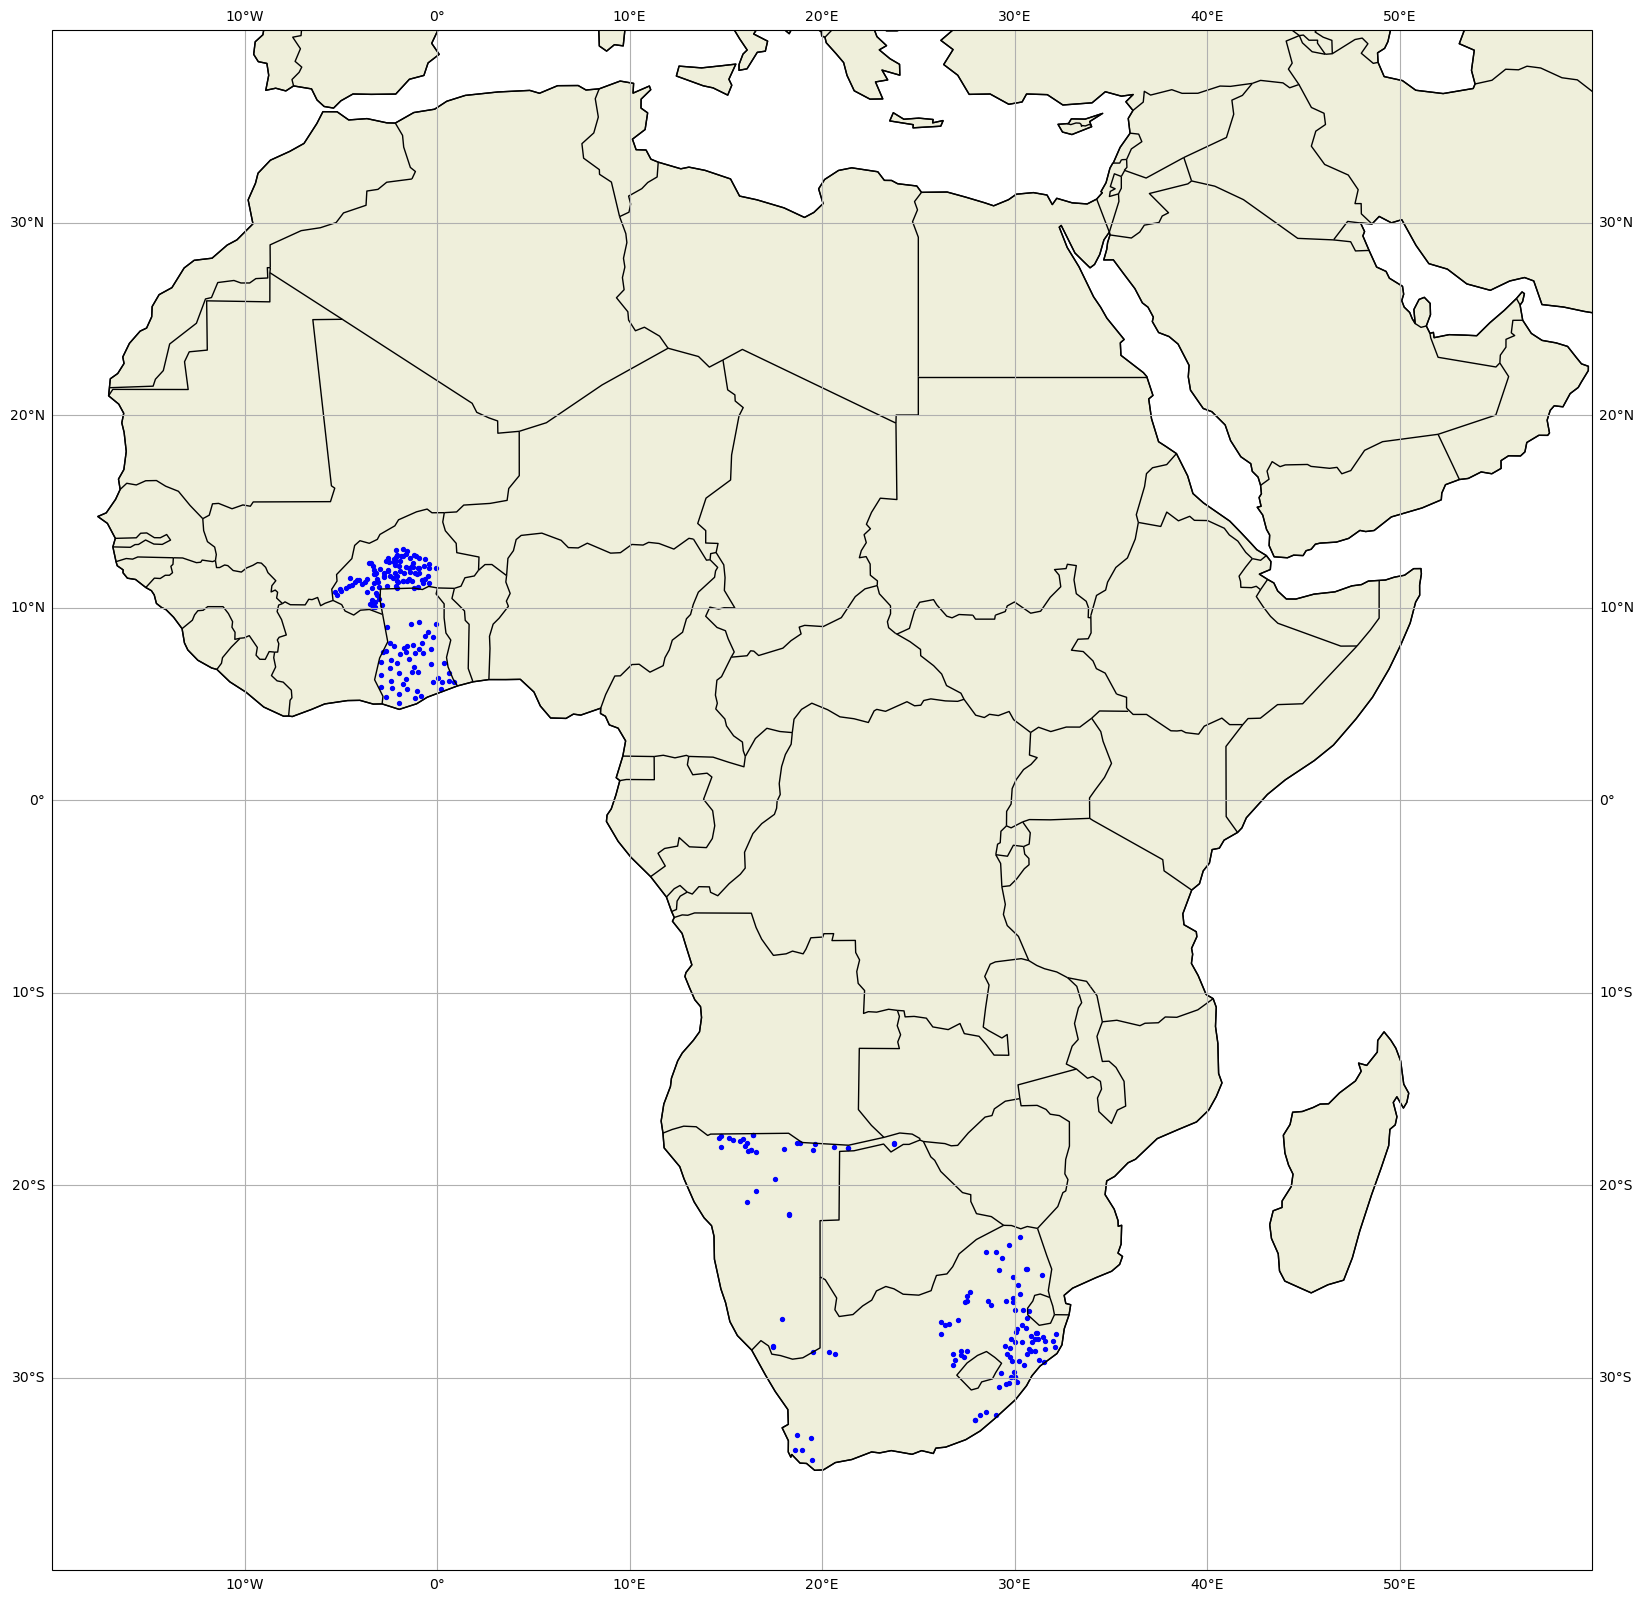

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a GeoDataFrame with the points from your properties DataFrame
gdf = gpd.GeoDataFrame(
    data, geometry=gpd.points_from_xy(data.X, data.Y)
)
gdf.crs = "EPSG:4326"  # Set the CRS to WGS84

# Create a PlateCarree projection for the map
crs_new = ccrs.PlateCarree()

# Plotting
fig, ax = plt.subplots(subplot_kw={'projection': crs_new}, figsize=(30, 20))

# Add Natural Earth low-resolution land and countries as base map
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.BORDERS, edgecolor='black')
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
ax.add_feature(cfeature.LAND, edgecolor='black')

# Plot the points on top of the base map
gdf.to_crs(crs_new).plot(ax=ax, color="blue", markersize=8)

# Set extent to focus on Africa (approximated by latitudes and longitudes)
ax.set_extent([-20, 60, -40, 40], crs=crs_new)

# Add gridlines
ax.gridlines(draw_labels=True)

# Show the plot
plt.show()

To get a feeling of our data, we can describe the dataset's properties with various statistical indicators. They are in the last 22 columns of the dataset.

In [10]:
if USE_FULL_PUBLIC_DATASET:
    display(data.loc[:, "Oxalate Extractable Fe (mg/kg)":"Total Antimony (mg/kg)"].describe().T)
else:
    display(data.loc[:, "Clay (%) pipette":"Organic C (%)"].describe().T)

count       mean        std   min     25%     50%    75%  \
Clay (%) pipette  267.0  16.902622  13.574111  0.10  6.0000  13.000  23.90   
pH-H2O            277.0   5.914585   0.890544  4.12  5.2600   5.880   6.40   
Organic C (%)     280.0   1.137750   0.898791  0.06  0.5275   0.845   1.43   

                    max  
Clay (%) pipette  68.00  
pH-H2O             8.63  
Organic C (%)      5.14

## Examining the spectra

In this part, we will plot the spectra as wavenumbers and wavelengths.

To this end, we will first create a `spectraxai.dataset.Dataset` object to hold the data. 

In [11]:
data.columns[-10:]

Index(['3977.5', '3979.6', '3981.6', '3983.7', '3985.7', '3987.8', '3989.8',
       '3991.9', '3993.9', '3996'],
      dtype='object')

In [12]:
from spectraxai.dataset import Dataset

X_end = "3996.0" if USE_FULL_PUBLIC_DATASET else "3996"

dataset = Dataset(
    X=data.loc[:, "499.2":X_end],
    X_names=data.loc[:, "499.2":X_end].columns.to_list(),
    Y=data.loc[:, "Organic C (%)"],
    Y_names=["Organic C (%)"]
)

### Plotting with x-axis depicting the wavenumbers

/opt/tljh/user/envs/soils4africa/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Text(0.5, 0, 'Wavenumber (cm$^{-1}$)')

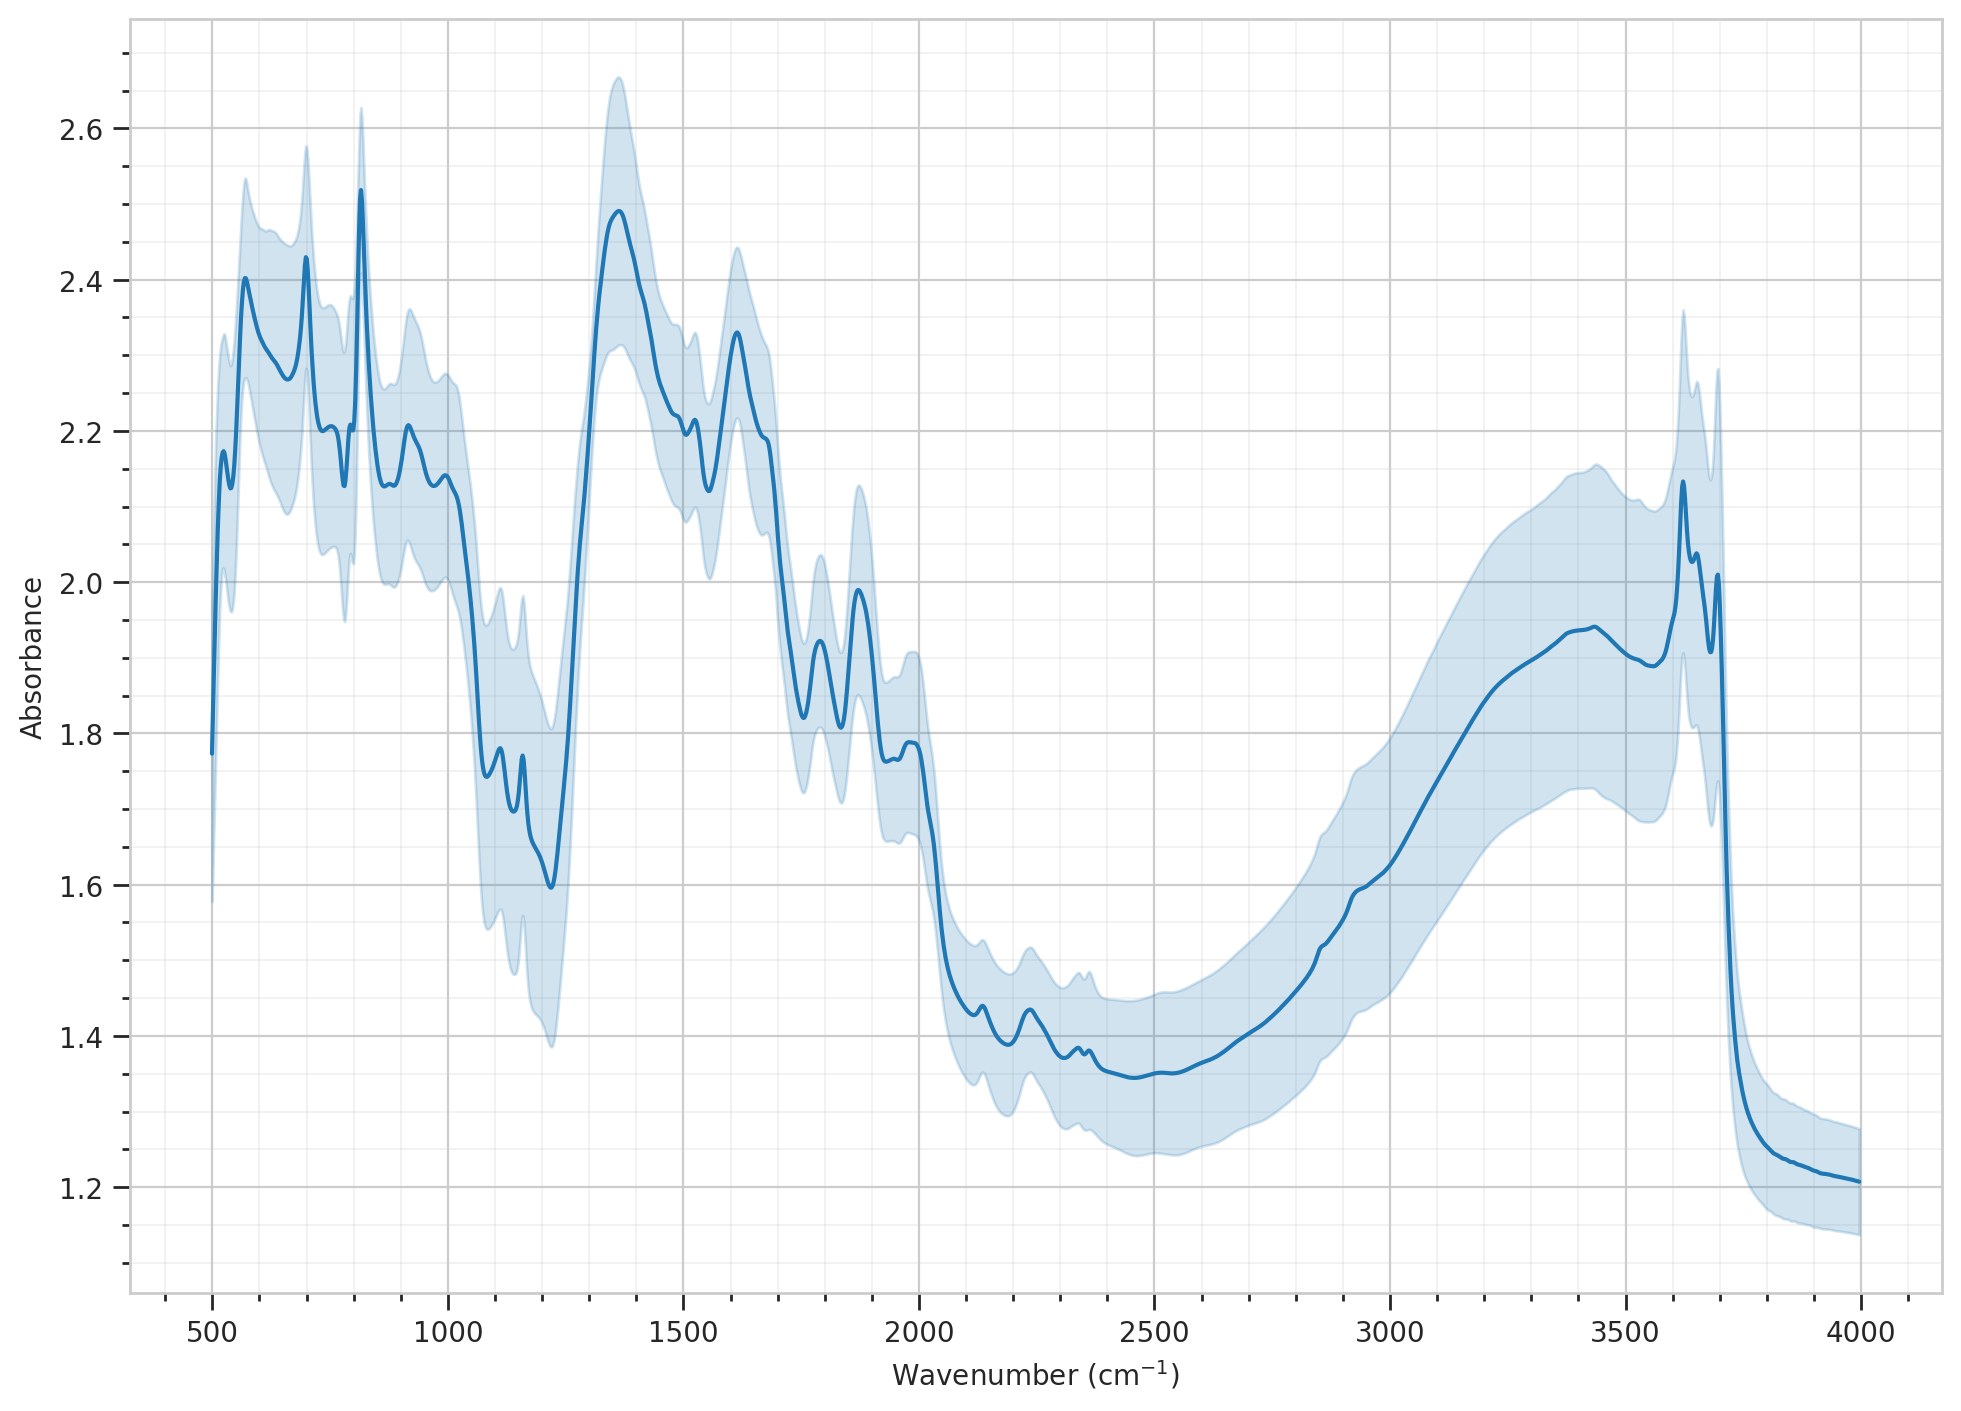

In [13]:
from spectraxai.explain import PreHocAnalysis

dataset.X_names = [round(float(key), 2) for key in dataset.X_names]
xai = PreHocAnalysis(dataset)
ax = xai.mean_spectrum()
ax.set_ylabel("Absorbance")
ax.set_xlabel(r'Wavenumber (cm$^{-1}$)')

## Transforming wavenumbers to wavelengths

To transform the predefined Wavenumbers given in the dataset to wavelengths (in m), one can use the equation:
    
  $x  cm ^ {-1} = (10.000.000 / x)  nm$

In [14]:
dataset.X_names = [round(10e6 / float(key), 2) for key in dataset.X_names]

Text(0.5, 0, 'Wavelength (nm)')

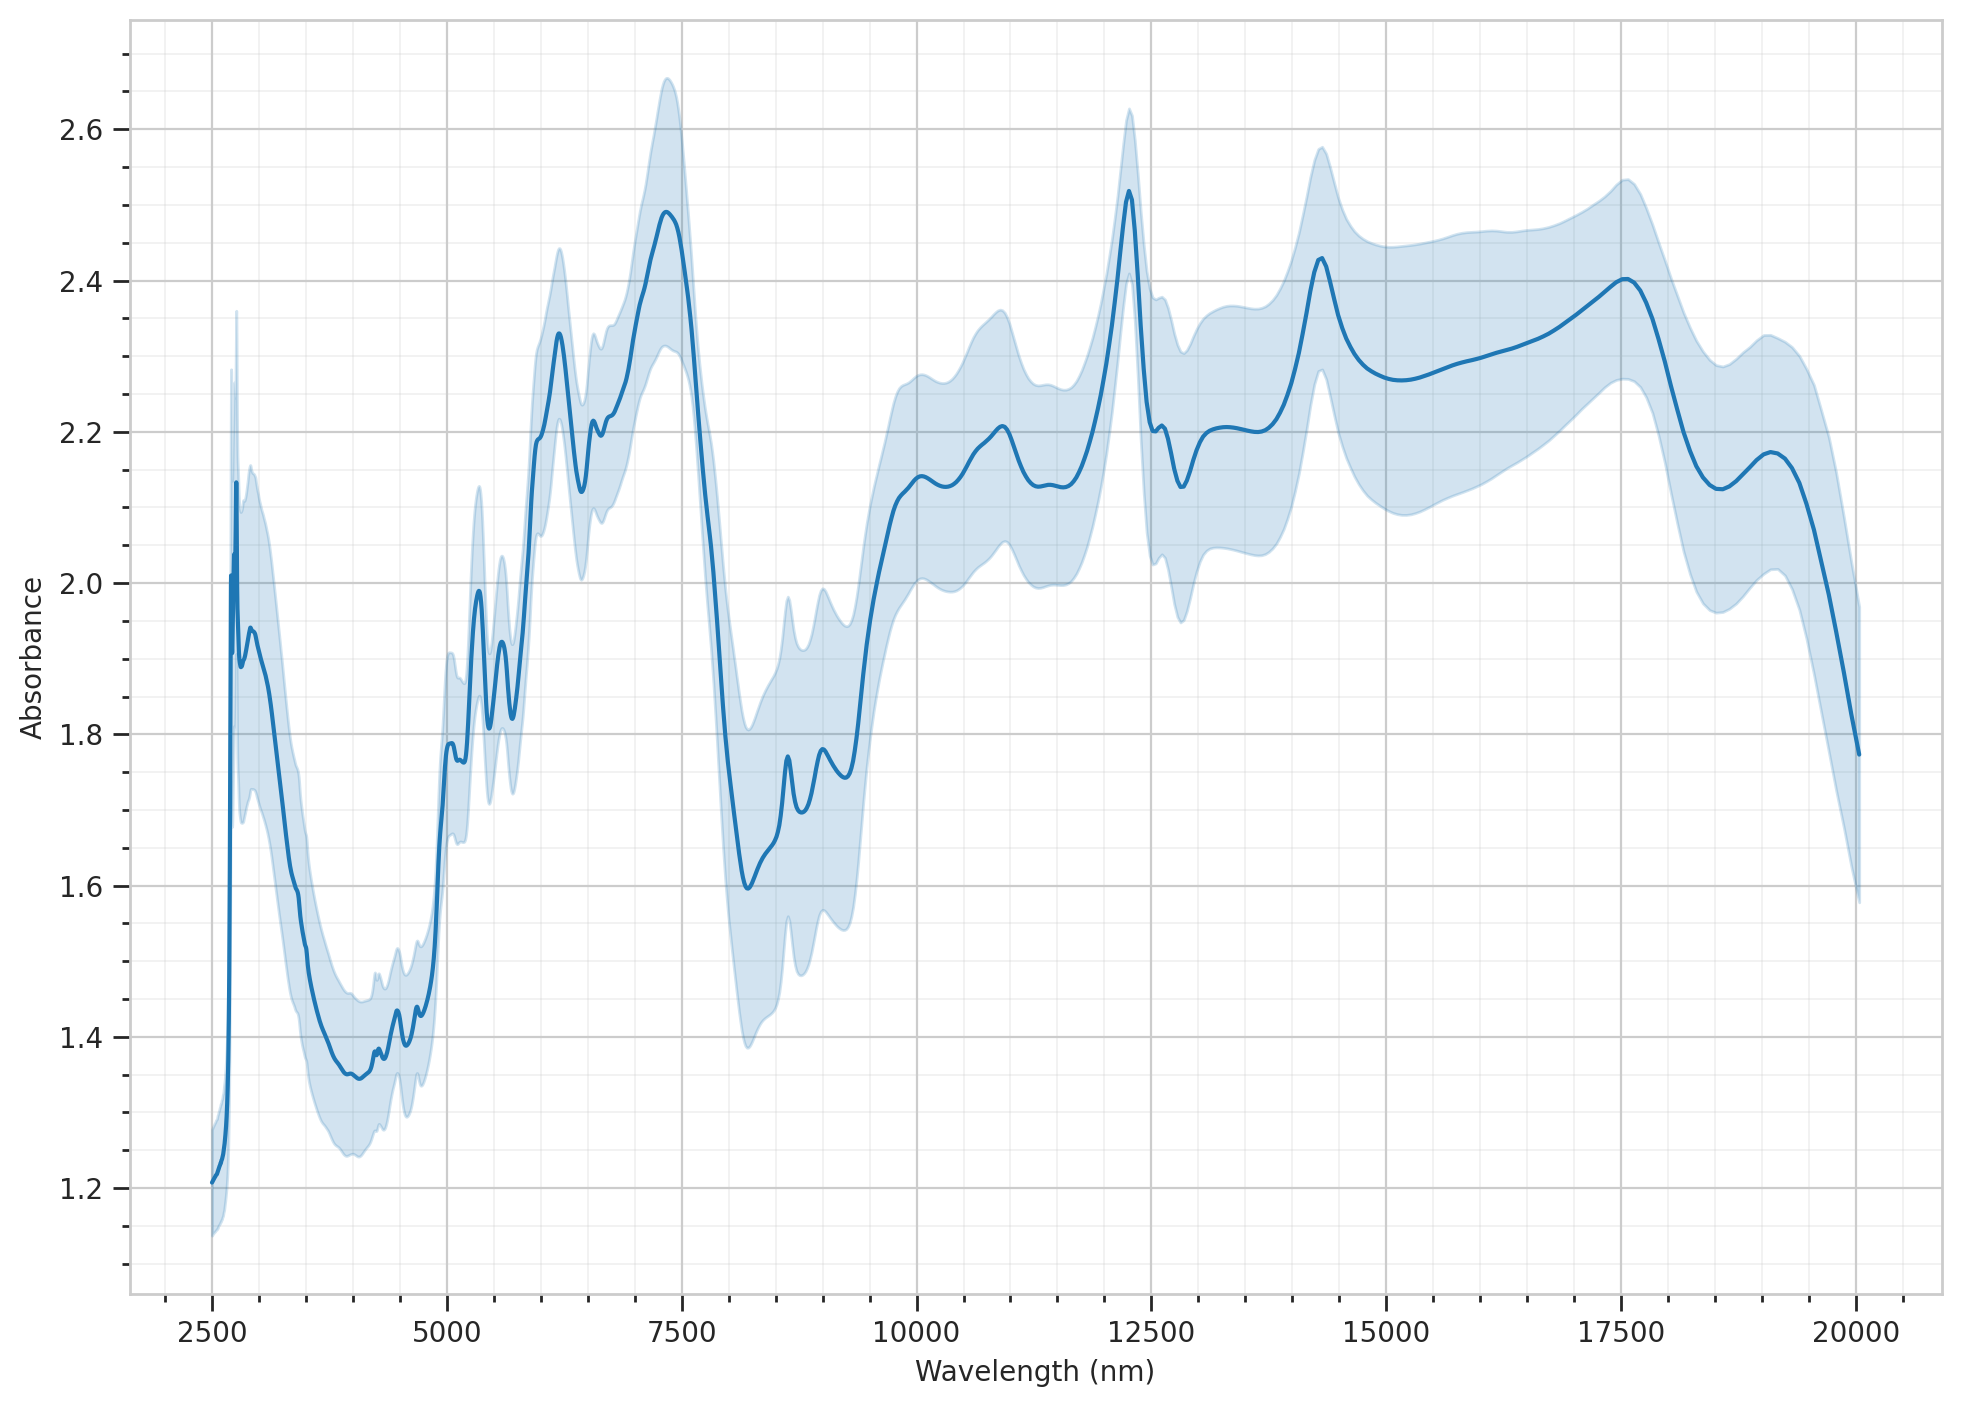

In [15]:
xai = PreHocAnalysis(dataset)
ax = xai.mean_spectrum()
ax.set_ylabel("Absorbance")
ax.set_xlabel('Wavelength (nm)')

# AI modeling

## Beginner Level

For the Beginner Level demonstration, we will use as input data the Spectra wavelength from 3996.7 to 498.8 as shown above in order to train an ML model that predicts some of the soil properties defined in the dataset.

More specifically, we will try to predict the soil texture, i.e., the three soil separates: Clay %, Silt % and Sand %, the total organic carbon, and the pH.



In [16]:
if USE_FULL_PUBLIC_DATASET:
    properties = ['Clay (%) pipette', 'Sand (%) pipette', 'Silt (%) pipette', 'pH-H2O', 'Total C (%)']
else:
    properties = ['Clay (%) pipette', 'pH-H2O', 'Organic C (%)']

Let's visualize the values of each target property. We will use a discrete color for each property using colorbrewer2's Paired palette.

In [17]:
import matplotlib
from matplotlib.colors import rgb2hex

cmap = matplotlib.colormaps.get_cmap("Paired")
colors = [rgb2hex(cmap(i)) for i in range(len(properties))]
colors

['#a6cee3', '#1f78b4', '#b2df8a']

### Property Distributions

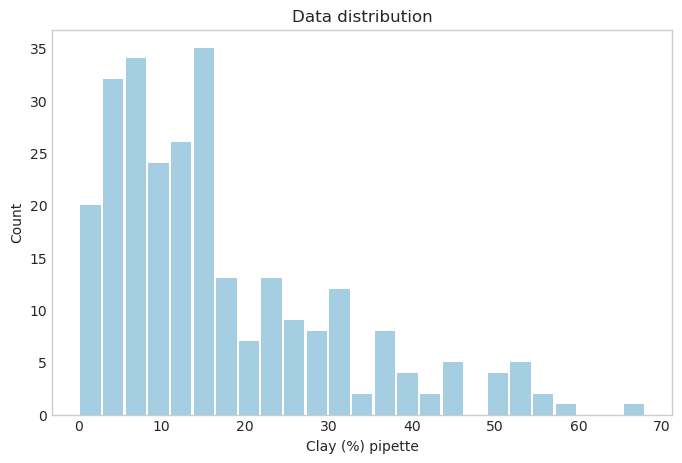

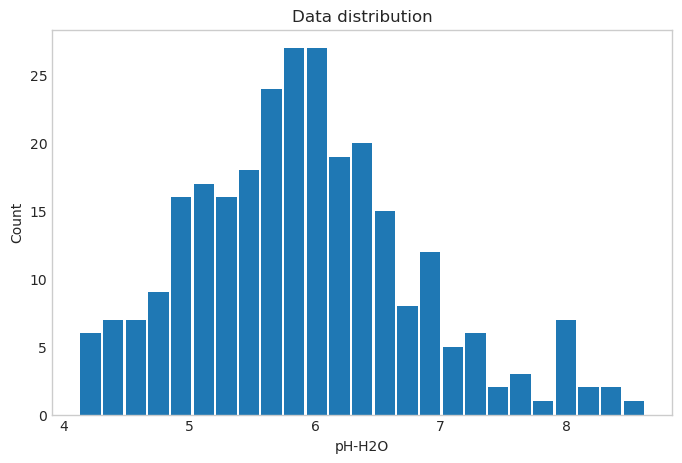

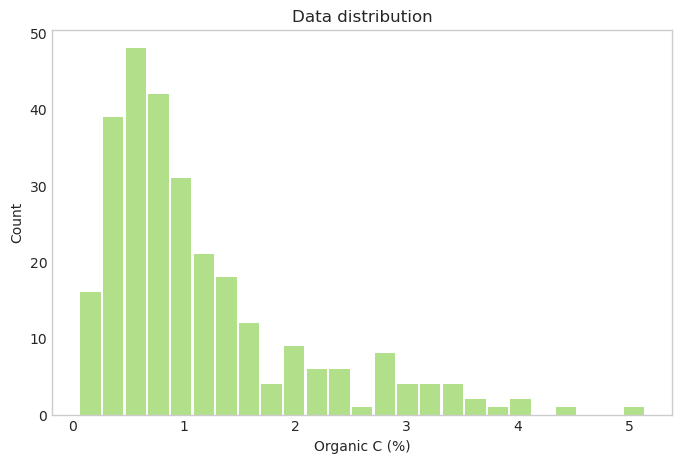

In [18]:
for i, p in enumerate(properties):
    plt.figure()
    ax = data[~data[p].isna()][p].hist(bins=25, grid=False, figsize=(8, 5), color=colors[i], zorder=2, rwidth=0.9)
    ax.set_xlabel(p)
    ax.set_ylabel('Count')
    ax.set_title('Data distribution')
    plt.show()

## Model building: MIR spectra to soil properties

We will now try to predict the properties from the MIR spectra

Using Spectraxai we create a spectraxai dataset and we split it randomly into 70% training and 30% testing sets.

Detailed documentation of spectraxai is provided at: https://portfolio.i-bec.org/spectraxai/spectraxai.html

In [19]:
# Initialize the datasets dictionary
datasets = {}

# Loop over the target variables
for p in properties:
    # Create the Dataset for each target variable by dropping also NAs (missing data)
    X_data = data[~data[p].isna()].loc[:, "499.2":X_end:2].iloc[:, ::-1]
    X_names = X_data.columns.to_list()
    Y_data = data[~data[p].isna()][p]

    # Create the dataset instance
    dataset = Dataset(
        X=X_data,
        X_names=X_names,
        Y=Y_data,
        Y_names=[p]
    )
    
    # Adjust the X_names to the required format
    dataset.X_names = [round(10e6 / float(key), 2) for key in dataset.X_names]

    # Add the dataset to the dictionary
    datasets[p] = dataset

### Data splitting

We will split the dataset into training set, used exclusively for model building, and test sets, used exclusively for model evaluation.

For each property we will do a separate split.

In [20]:
from spectraxai.dataset import DatasetSplit

splits = {}
for p in properties:
    idx_trn, idx_tst = datasets[p].train_test_split(DatasetSplit.RANDOM, 0.7)
    splits[p] = (idx_trn, idx_tst)

Let's see some statistics of each property dataset created.

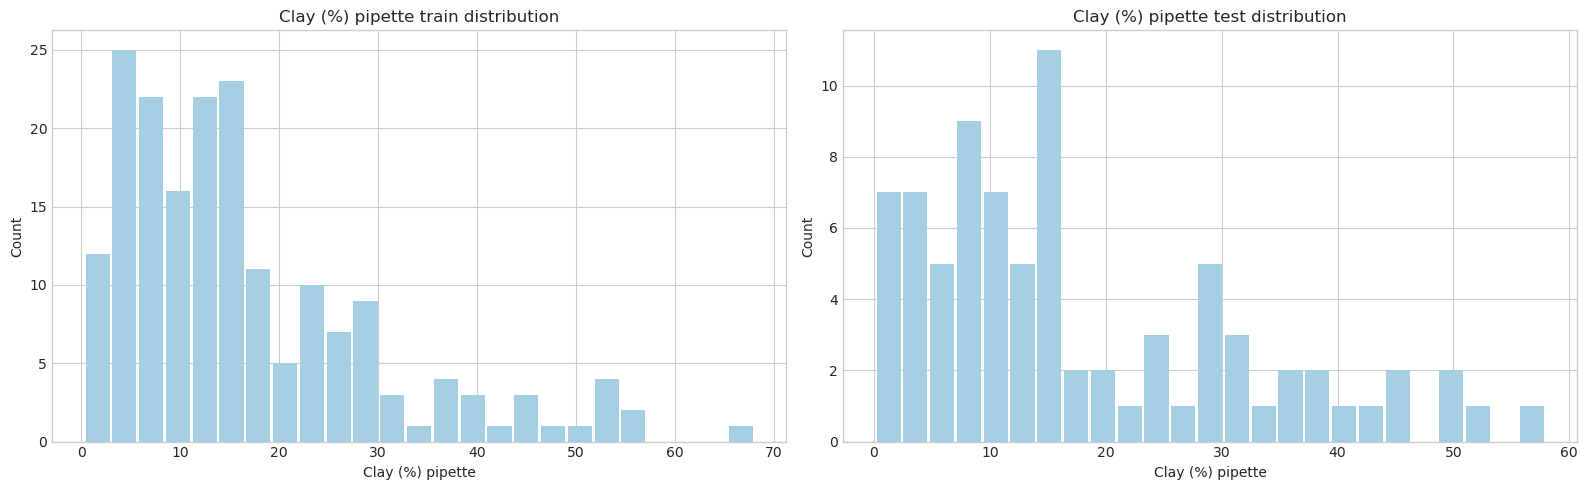

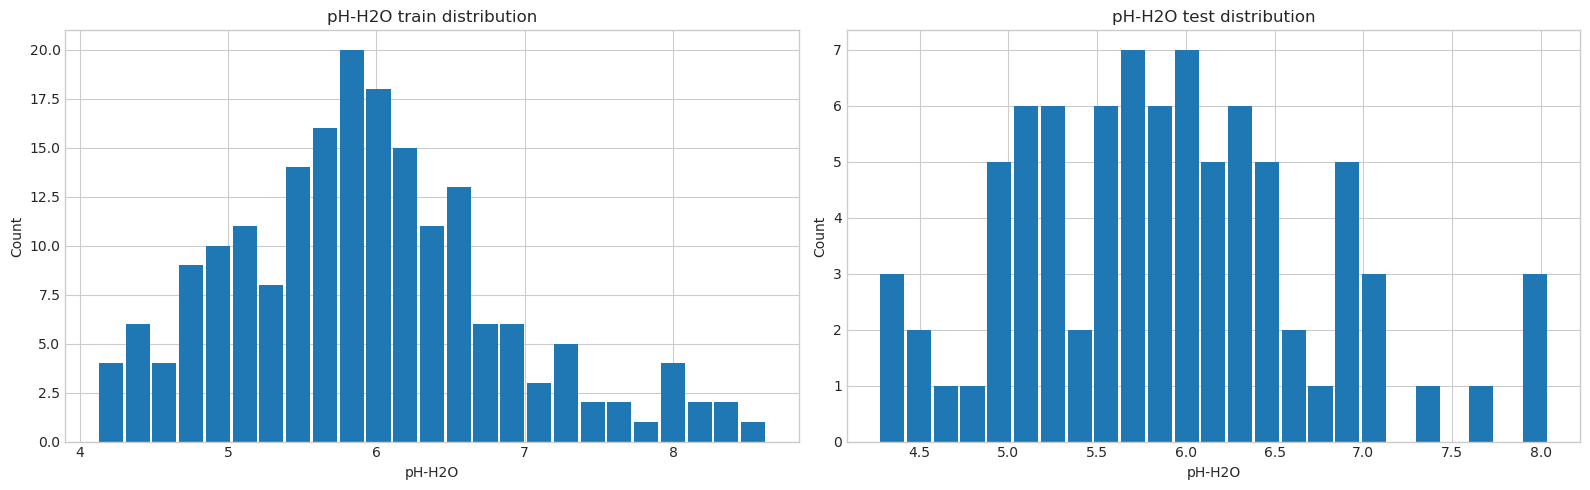

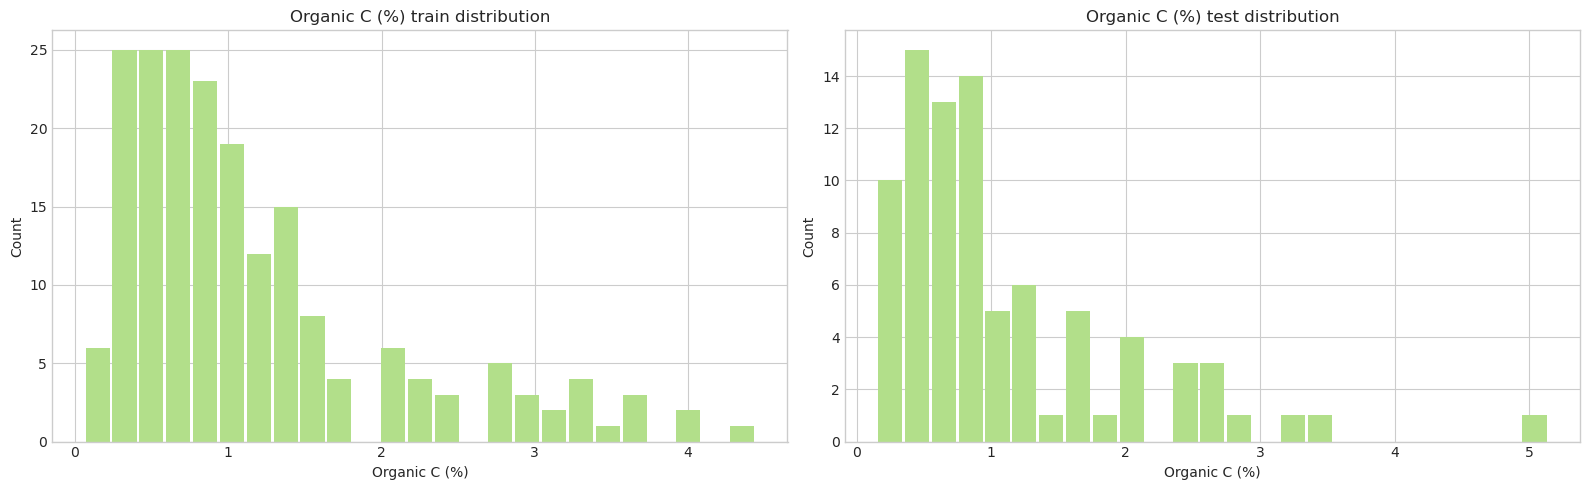

In [21]:
for i, p in enumerate(properties):
    # Create a figure with two subplots (1 row, 2 columns)
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))

    y = datasets[p].Y.squeeze()
    
    # Plot the histogram for the training data
    ax = axes[0]  # Left subplot (Training data)
    ax.hist(y[splits[p][0]], bins=25, color=colors[i], zorder=2, rwidth=0.9)
    ax.set_xlabel(p)
    ax.set_ylabel('Count')
    ax.set_title(f'{p} train distribution')

    # Plot the histogram for the test data
    ax = axes[1]  # Right subplot (Test data)
    ax.hist(y[splits[p][1]], bins=25, color=colors[i], zorder=2, rwidth=0.9)
    ax.set_xlabel(p)
    ax.set_ylabel('Count')
    ax.set_title(f'{p} test distribution')

    # Adjust the layout and show the figure
    plt.tight_layout()
    plt.show()

### Model training & predicting

* Now we will predict the properties by training an ML model using the [Random Forest algorithm](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) and evaluate the predictions according to the following  metrics:
    1) Root Mean Square Error (RMSE)
    2) R Squared ($R^2$)
    3) Ratio of performance to Interquantile (RPIQ)

* For more detailed information of the prediction results, we will create a scatter plot: Scatter plots visualize the difference between the predicted values with the observed (or true values)  ones. The dashed line represents the perfect prediction while the blue line the predictions that were actually done.

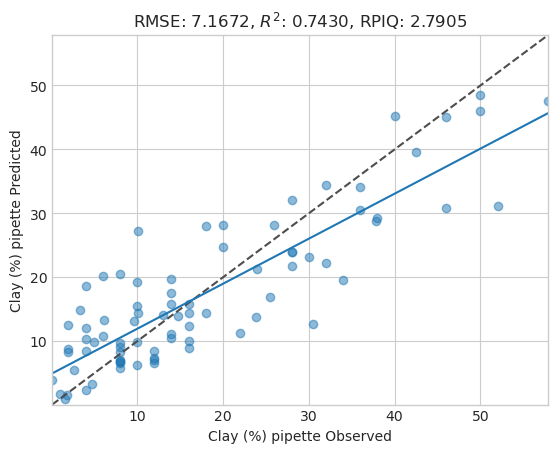

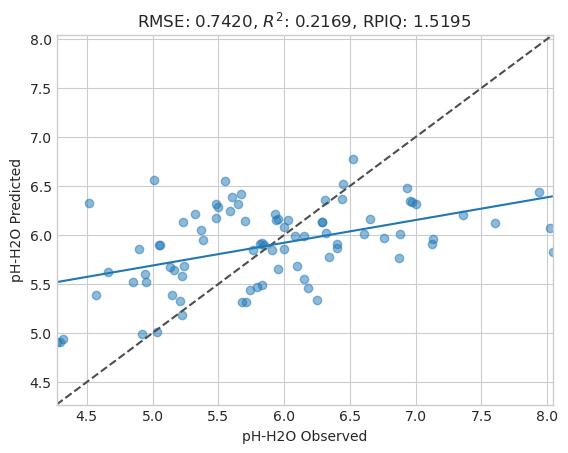

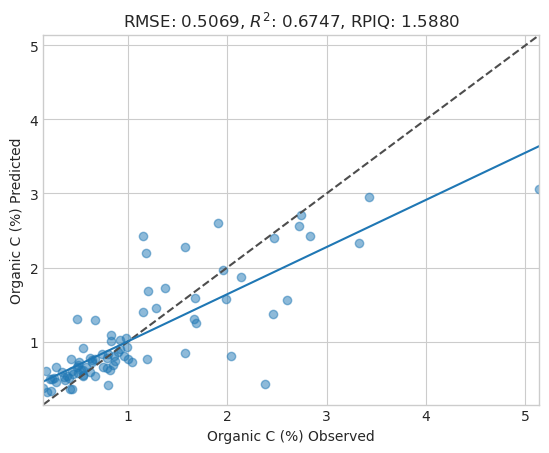

In [22]:
from spectraxai.models import StandardModel, Model
from spectraxai.utils import scatter_plot


# Initialize the Random Forest model from spectraxai
rf = StandardModel(Model.RF)

# Loop through each property to train and evaluate the model
for p in properties:
    # Retrieve the training and test indices from splits for the current property
    idx_trn, idx_tst = splits[p]

    # Create training and test datasets using the indices
    dataset_trn = datasets[p].subset(idx_trn)
    dataset_tst = datasets[p].subset(idx_tst)
    
    # Train the Random Forest model on the training dataset
    rf.fit(dataset_trn)

    # Use the trained model to predict on the test dataset
    y_hat = rf.predict(dataset_tst.X)

    # Create a scatter plot to compare observed vs. predicted values
    ax = scatter_plot(dataset_tst.Y.squeeze(), y_hat)
    ax.set_xlabel(f'{p} Observed')
    ax.set_ylabel(f'{p} Predicted')
    
    # Display the plot for the current property
    plt.show()

## Intermediate Level

In the intermediate Level, we will upgrade the former pipeline in order to get more predictions
using different preprocessing techniques and more ML algorithms to train the model.

* Dataset Split Cross Validation with 5 folds:

During Cross Validation the dataset is split into 5 different ways to reassure that all data were part of the training or the test dataset. In the Figure an example is demonstrated of how a dataset can be split with Cross Validation into 5 folds. Each fold is used for predictions and the results then can be compared. 


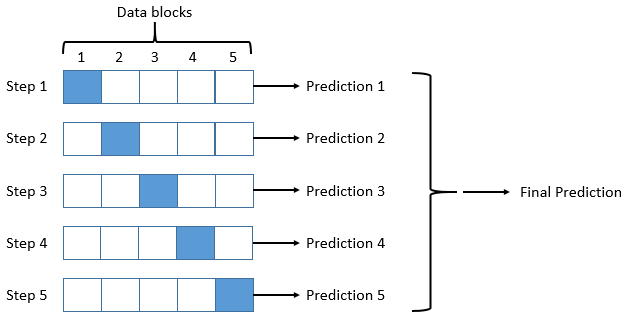


Additionally, in this part we will test a preprocessing method of transforming the previous spectra from Reflectance to Standard Normal Variate. Various preprocessing techniques, transform spectra into a distinct form, giving the chance to the model to find hidden paterns.

### Fit and predict using different models and multiple spectral pre-treatments

In [23]:
from spectraxai.spectra import SpectralPreprocessing 
from spectraxai.models import Model, StandardModel


preprocesses = [
    [
        SpectralPreprocessing.NONE # i.e., just the absorbance spectra
    ],
    [
        SpectralPreprocessing.SNV
    ]
]
models = [Model.RF, Model.PLS, Model.SVR]

for p in properties:
    for model in models:
        print(p, model)

        # Create trn and tst indices using 5-fold CV
        idx_trn, idx_tst = datasets[p].train_test_split(DatasetSplit.CROSS_VALIDATION, 5)
    
        # Define the model
        model = StandardModel(model)
    
        # Fit and predict multiple pre-treatments in one go
        res = model.fit_and_predict_multiple(datasets[p], preprocesses=preprocesses, idx_trn=idx_trn)
    
        # Show the mean results per each pre-treatment (i.e., averaging across the 5-folds)
        display(res.groupby('pre_process').mean(numeric_only=True))


Clay (%) pipette RF


N      RMSE        R2      RPIQ  val_score  n_estimators  \
pre_process                                                                
[SNV]        53.4  7.502889  0.670998  2.172989   0.211099         110.0   
[no]         53.4  7.345804  0.683035  2.198247   0.120263         140.0   

             training_time  testing_time  fold  
pre_process                                     
[SNV]            18.260190      0.009611   3.0  
[no]             18.876387      0.011744   3.0

Clay (%) pipette PLS


N      RMSE        R2      RPIQ  val_score  n_components  \
pre_process                                                                
[SNV]        53.4  7.212495  0.704838  2.298170   0.311589           9.6   
[no]         53.4  6.992556  0.726595  2.343533   0.341589           8.8   

             training_time  testing_time  fold  
pre_process                                     
[SNV]             2.769247      0.000540   3.0  
[no]              2.697442      0.001542   3.0

Clay (%) pipette SVR


N      RMSE        R2      RPIQ  val_score      C  epsilon  \
pre_process                                                                  
[SNV]        53.4  6.594084  0.750593  2.442928   0.305336  460.8    0.402   
[no]         53.4  7.354631  0.695799  2.169088   0.341566  260.8    0.206   

                gamma    SVs  training_time  testing_time  fold  
pre_process                                                      
[SNV]        0.000402  200.8       1.722877      0.006062   3.0  
[no]         0.000402  202.8       1.789814      0.006980   3.0

pH-H2O RF


N      RMSE        R2      RPIQ  val_score  n_estimators  \
pre_process                                                                
[SNV]        55.4  0.667594  0.414449  1.693896   0.301122         150.0   
[no]         55.4  0.767805  0.224419  1.449508   0.093702         110.0   

             training_time  testing_time  fold  
pre_process                                     
[SNV]            19.815614      0.012802   3.0  
[no]             21.440185      0.009708   3.0

pH-H2O PLS


N      RMSE        R2      RPIQ  val_score  n_components  \
pre_process                                                                
[SNV]        55.4  0.514784  0.641383  1.941102   0.499403          10.2   
[no]         55.4  0.535565  0.616215  1.873044   0.473836          10.8   

             training_time  testing_time  fold  
pre_process                                     
[SNV]             2.832395      0.001000   3.0  
[no]              2.945758      0.002497   3.0

pH-H2O SVR


N      RMSE        R2      RPIQ  val_score      C  epsilon  \
pre_process                                                                  
[SNV]        55.4  0.509505  0.636288  2.232559   0.577861   35.2    0.130   
[no]         55.4  0.567028  0.571071  1.960548   0.499826  108.8    0.162   

                gamma    SVs  training_time  testing_time  fold  
pre_process                                                      
[SNV]        0.000273  168.8       1.724208      0.006456   3.0  
[no]         0.000273  164.2       1.780203      0.004643   3.0

Organic C (%) RF


N      RMSE        R2      RPIQ  val_score  n_estimators  \
pre_process                                                                
[SNV]        56.0  0.445294  0.747613  2.011557   0.559160          90.0   
[no]         56.0  0.533792  0.634287  1.701421   0.388979         120.0   

             training_time  testing_time  fold  
pre_process                                     
[SNV]            19.669507      0.007668   3.0  
[no]             21.746151      0.011065   3.0

Organic C (%) PLS


N      RMSE        R2      RPIQ  val_score  n_components  \
pre_process                                                                
[SNV]        56.0  0.377519  0.801243  2.382037   0.710864           7.4   
[no]         56.0  0.387415  0.794051  2.332767   0.693159           8.2   

             training_time  testing_time  fold  
pre_process                                     
[SNV]             3.064204      0.001242   3.0  
[no]              3.137862      0.000887   3.0

Organic C (%) SVR


N      RMSE        R2      RPIQ  val_score     C  epsilon  \
pre_process                                                                 
[SNV]        56.0  0.328039  0.858171  3.077071   0.774427  10.4    0.052   
[no]         56.0  0.354782  0.833579  2.708512   0.756460  16.0    0.100   

                gamma    SVs  training_time  testing_time  fold  
pre_process                                                      
[SNV]        0.000239  173.0       1.578239      0.005852   3.0  
[no]         0.000239  134.4       1.642185      0.003975   3.0

## Expert Level

At this Level, we will try to better understand our dataset using various Pre and Post Hoc analysis.

### Pre Hoc Analysis of the dataset

The first step is to view the correlation of each feature of the dataset according to the preprocessing. In order to achieve that, **Pearson's correlation** is applied which indicates the description of the relationship between the property and the preprocessing. When Pearson's Correlation is 1, the two features are highly correlated and when it is -1, the features are irrelevant.

We will now display the best feature / wavelength (i.e., the one with the highest absolute correlation) for each property

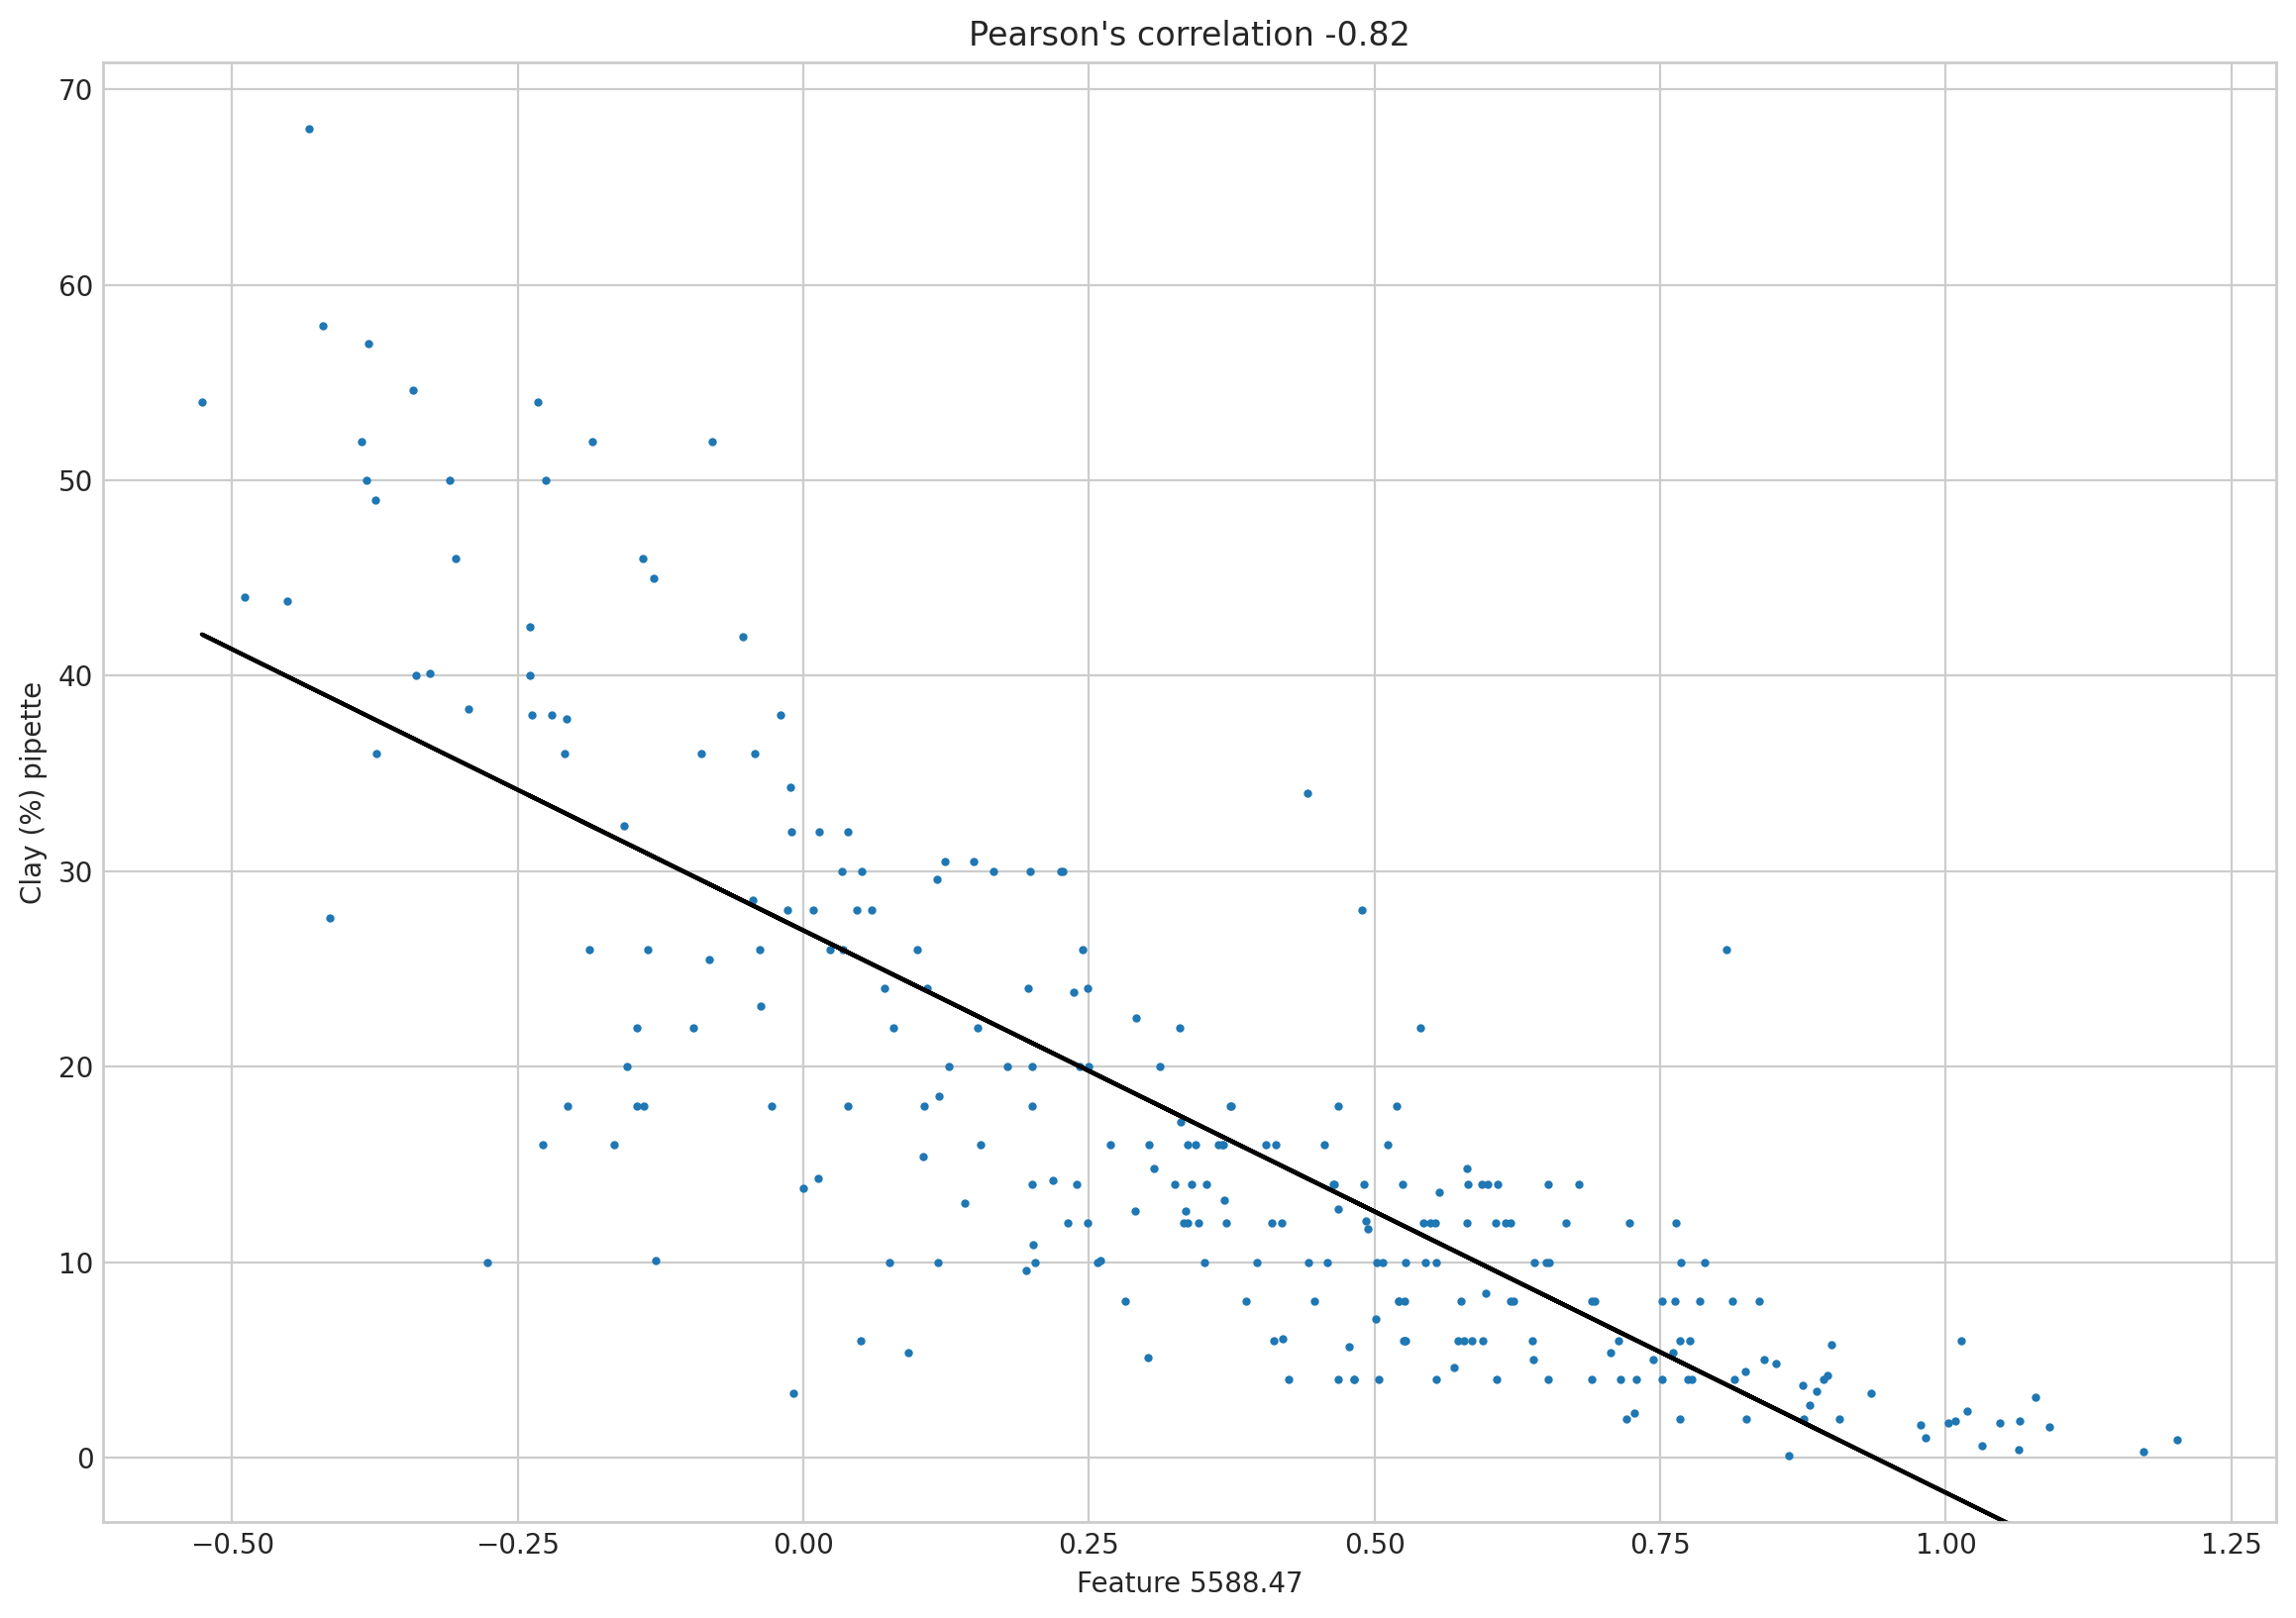

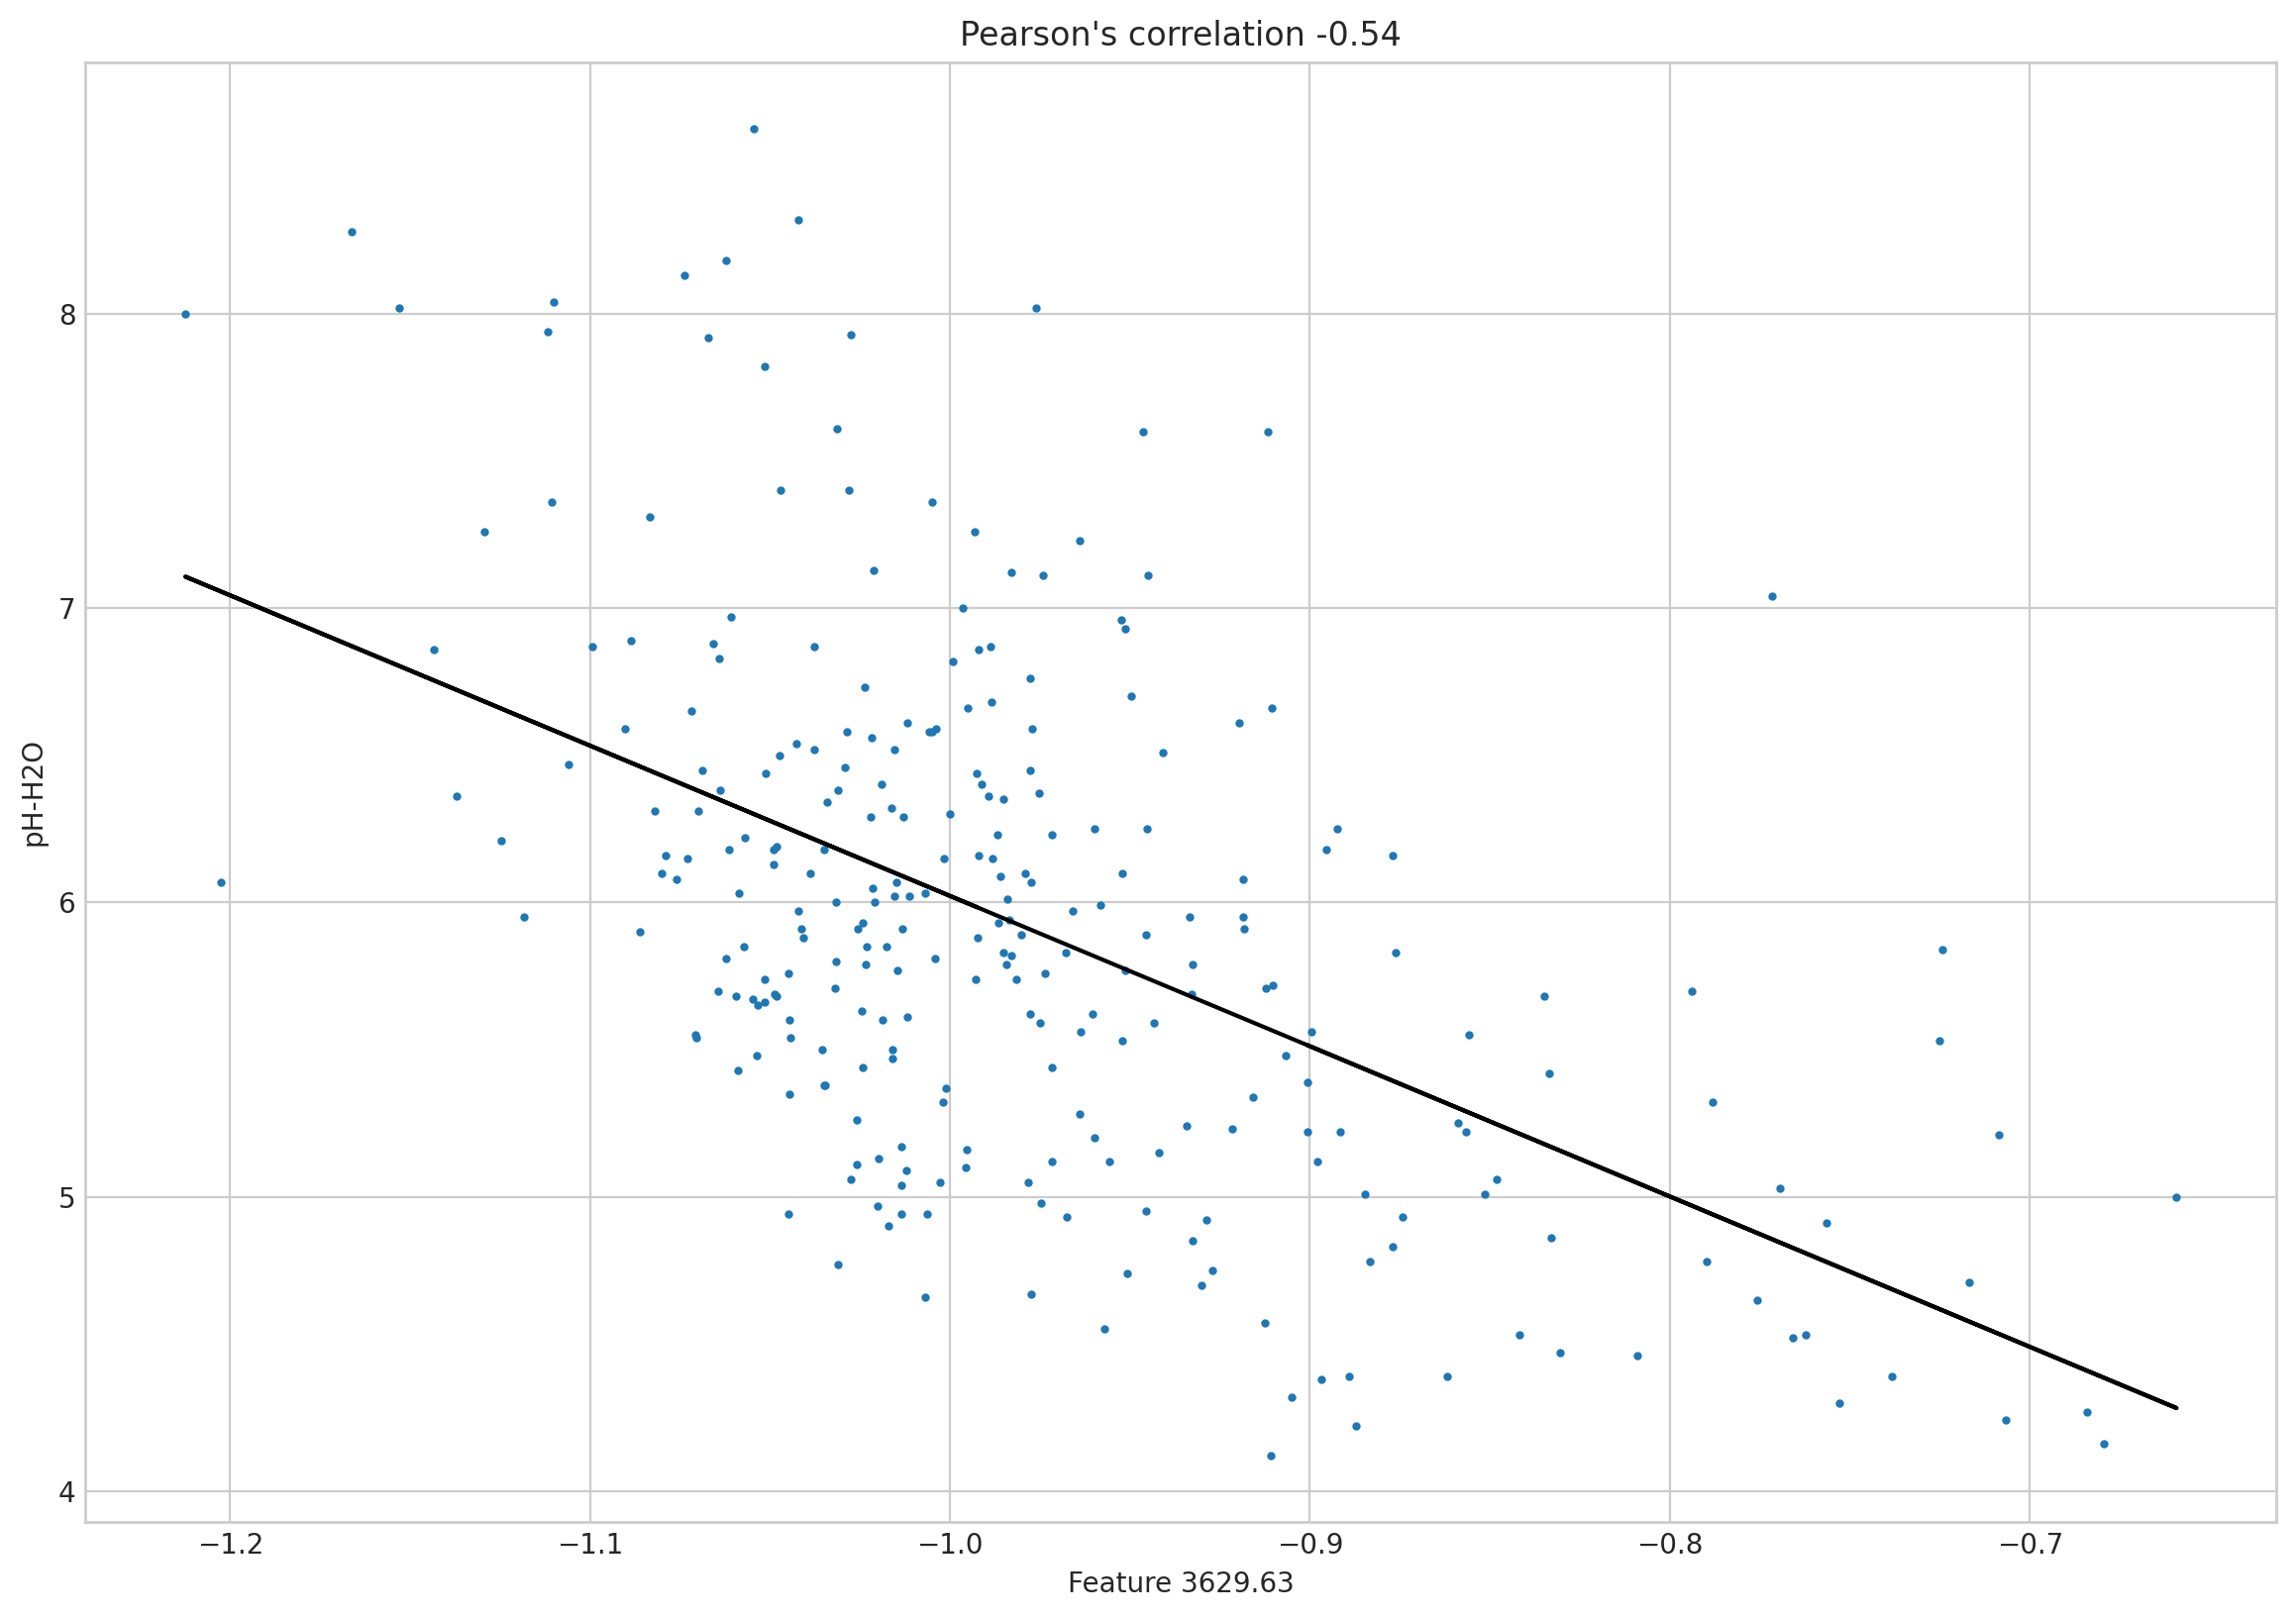

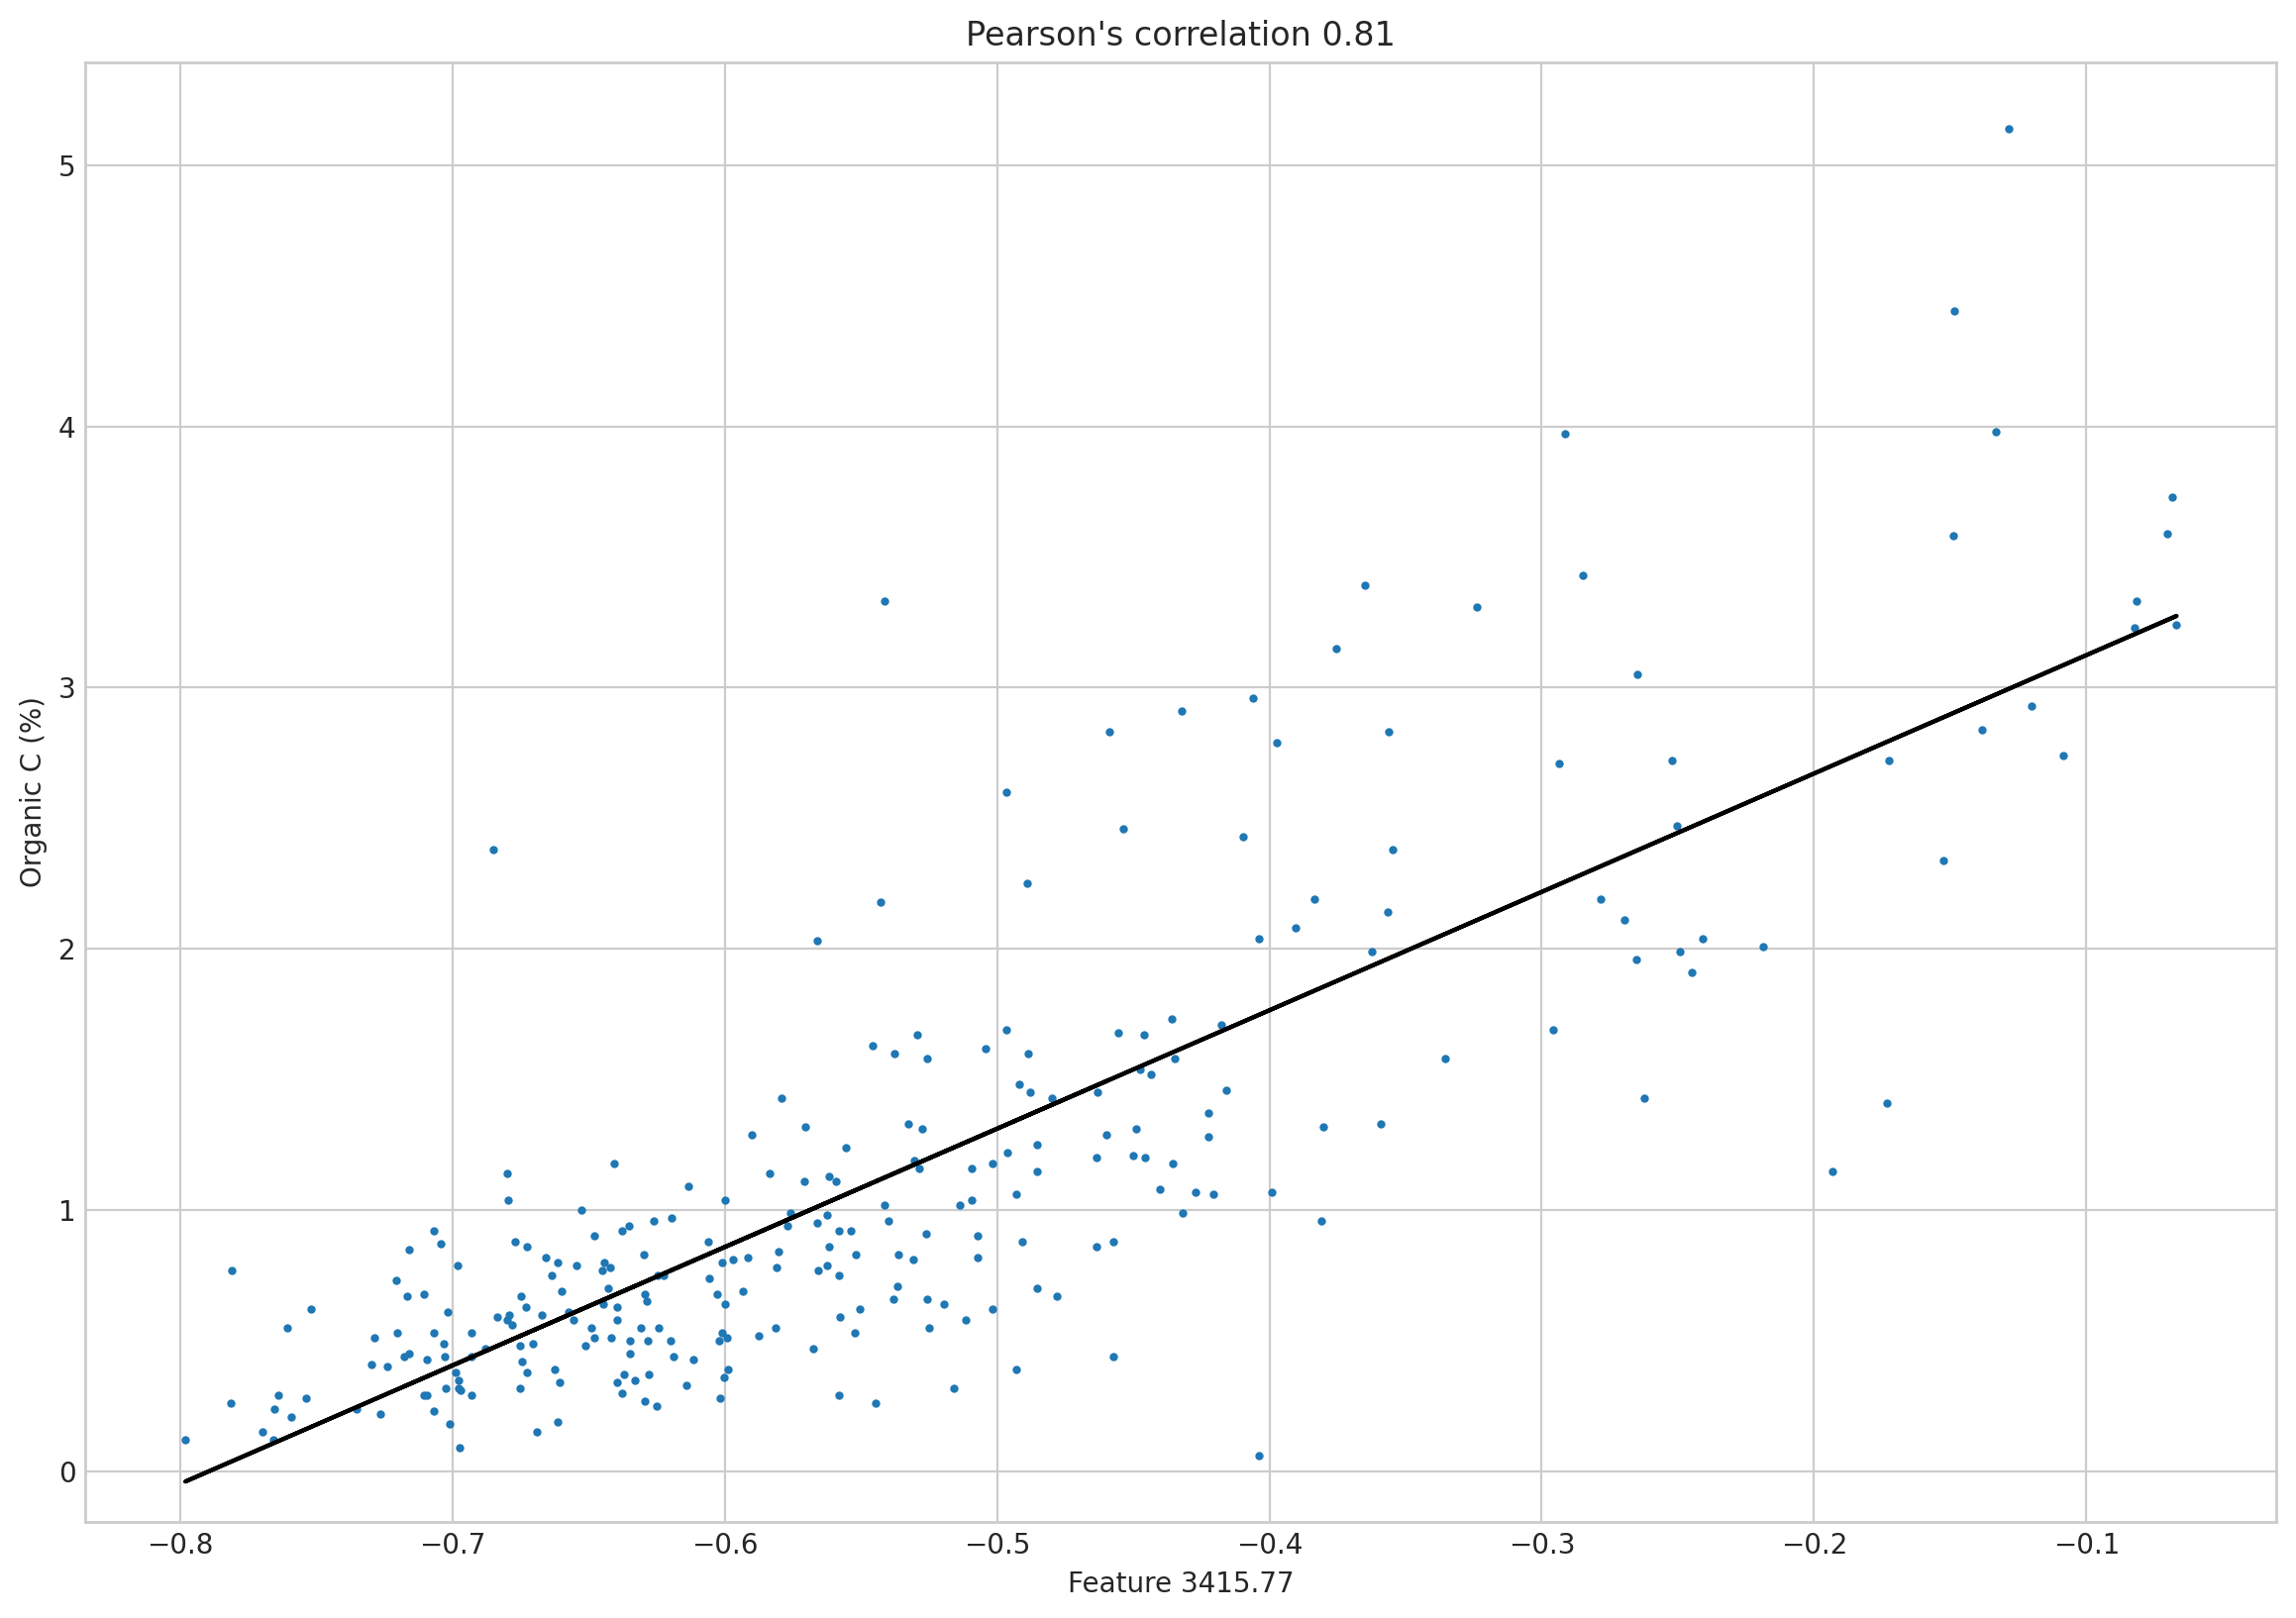

In [24]:
for p in properties:
    xai = PreHocAnalysis(datasets[p].preprocess([SpectralPreprocessing.SNV]))
    axes = xai.correlogram(top=1)
    axes[0, 0].set_ylabel(f'{p}')

Next step is to demonstrate the feature importance of each nm of the wavelength in the each property prediction.

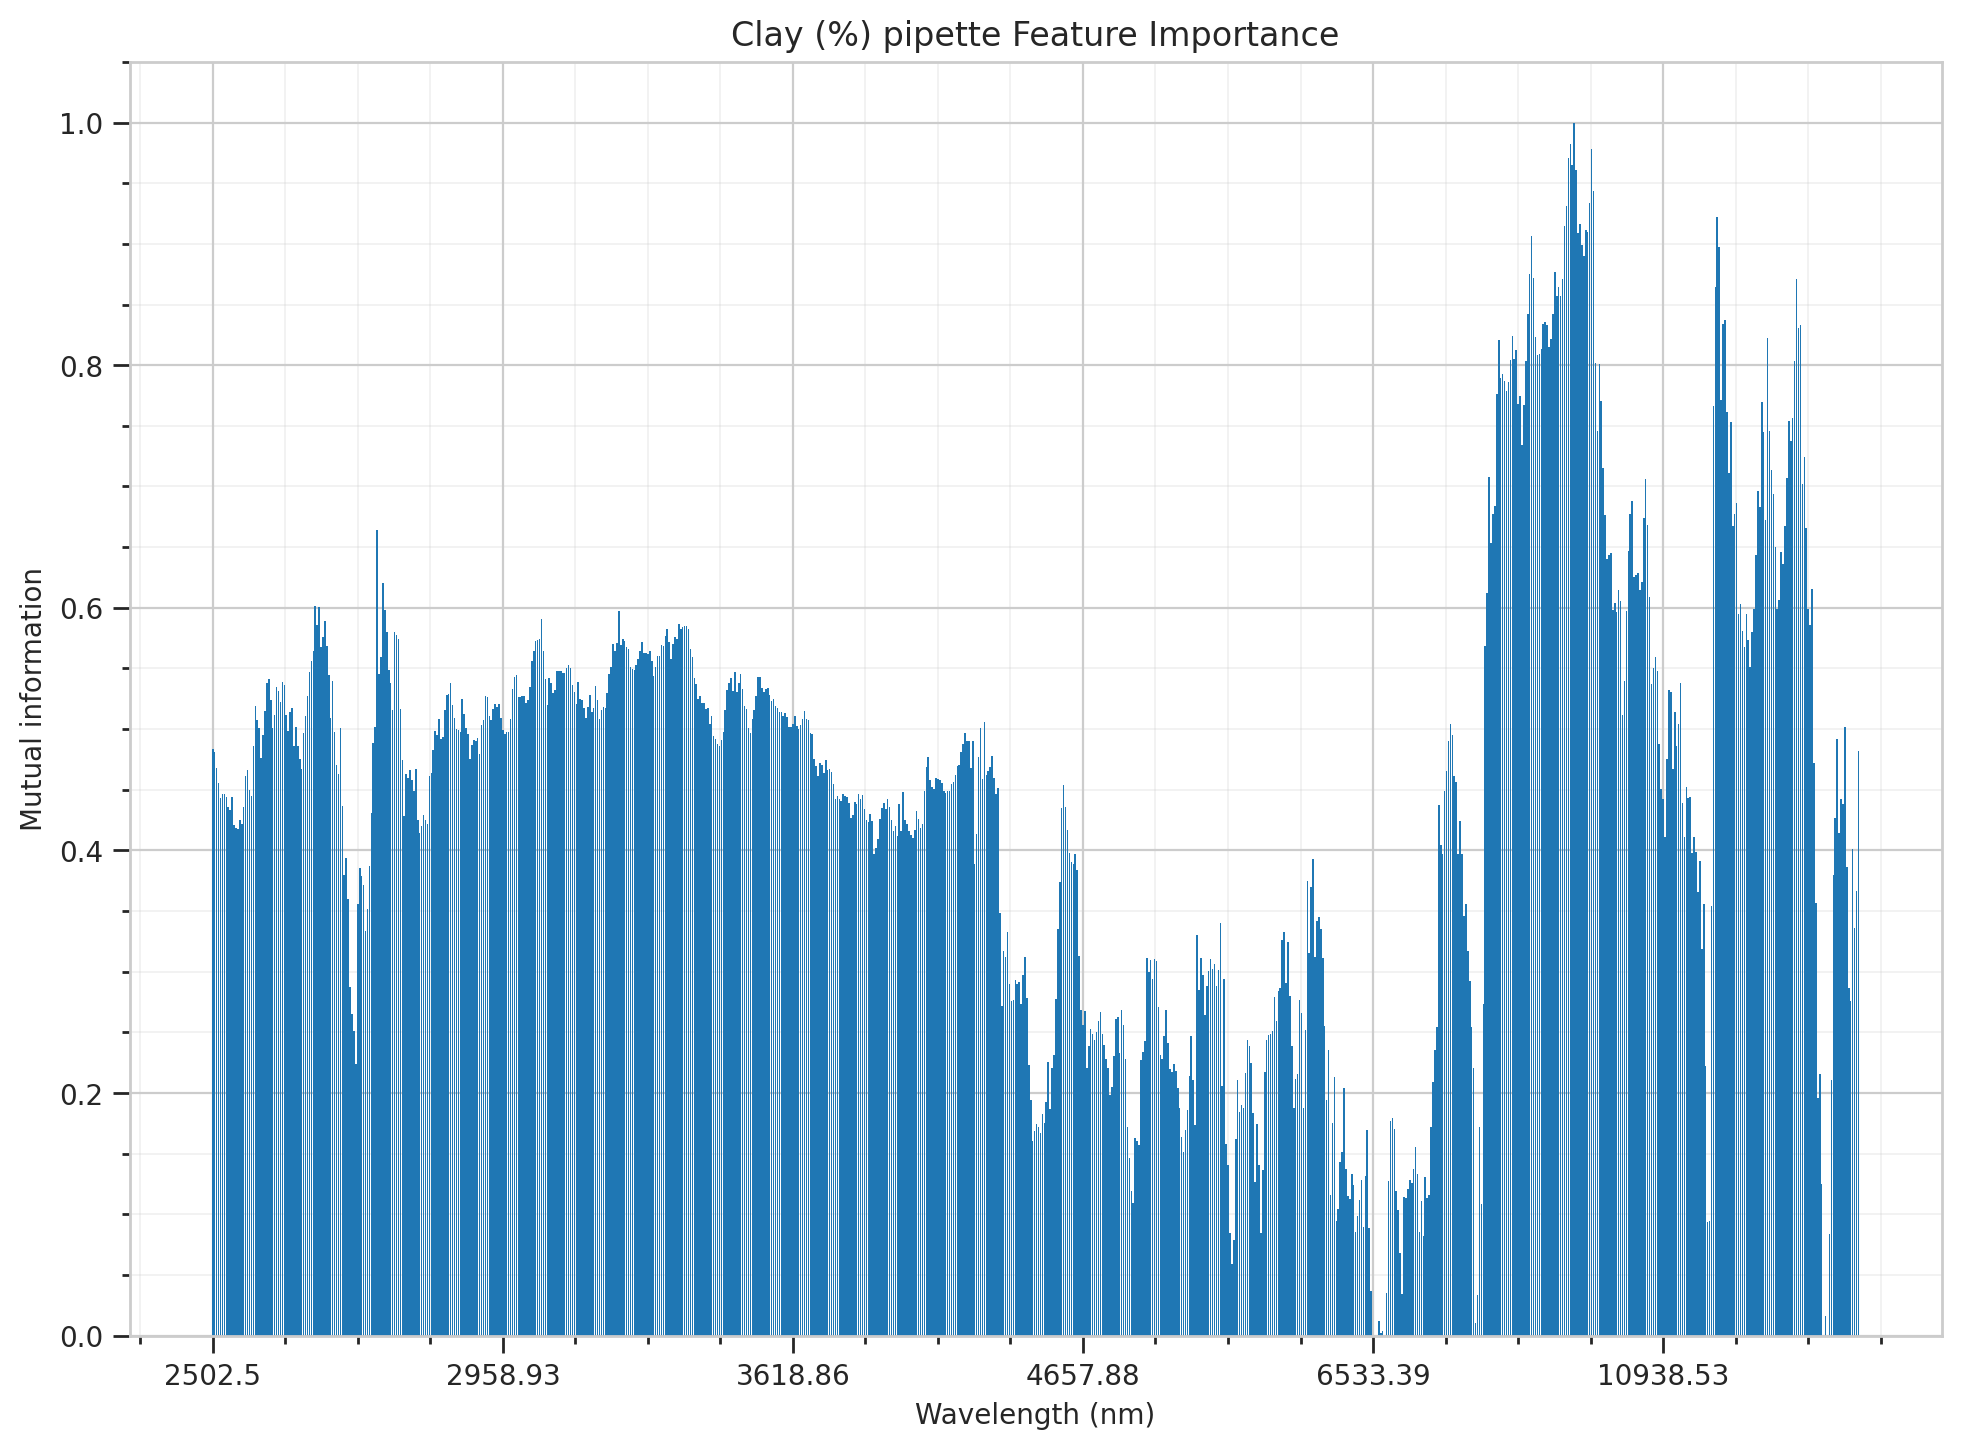

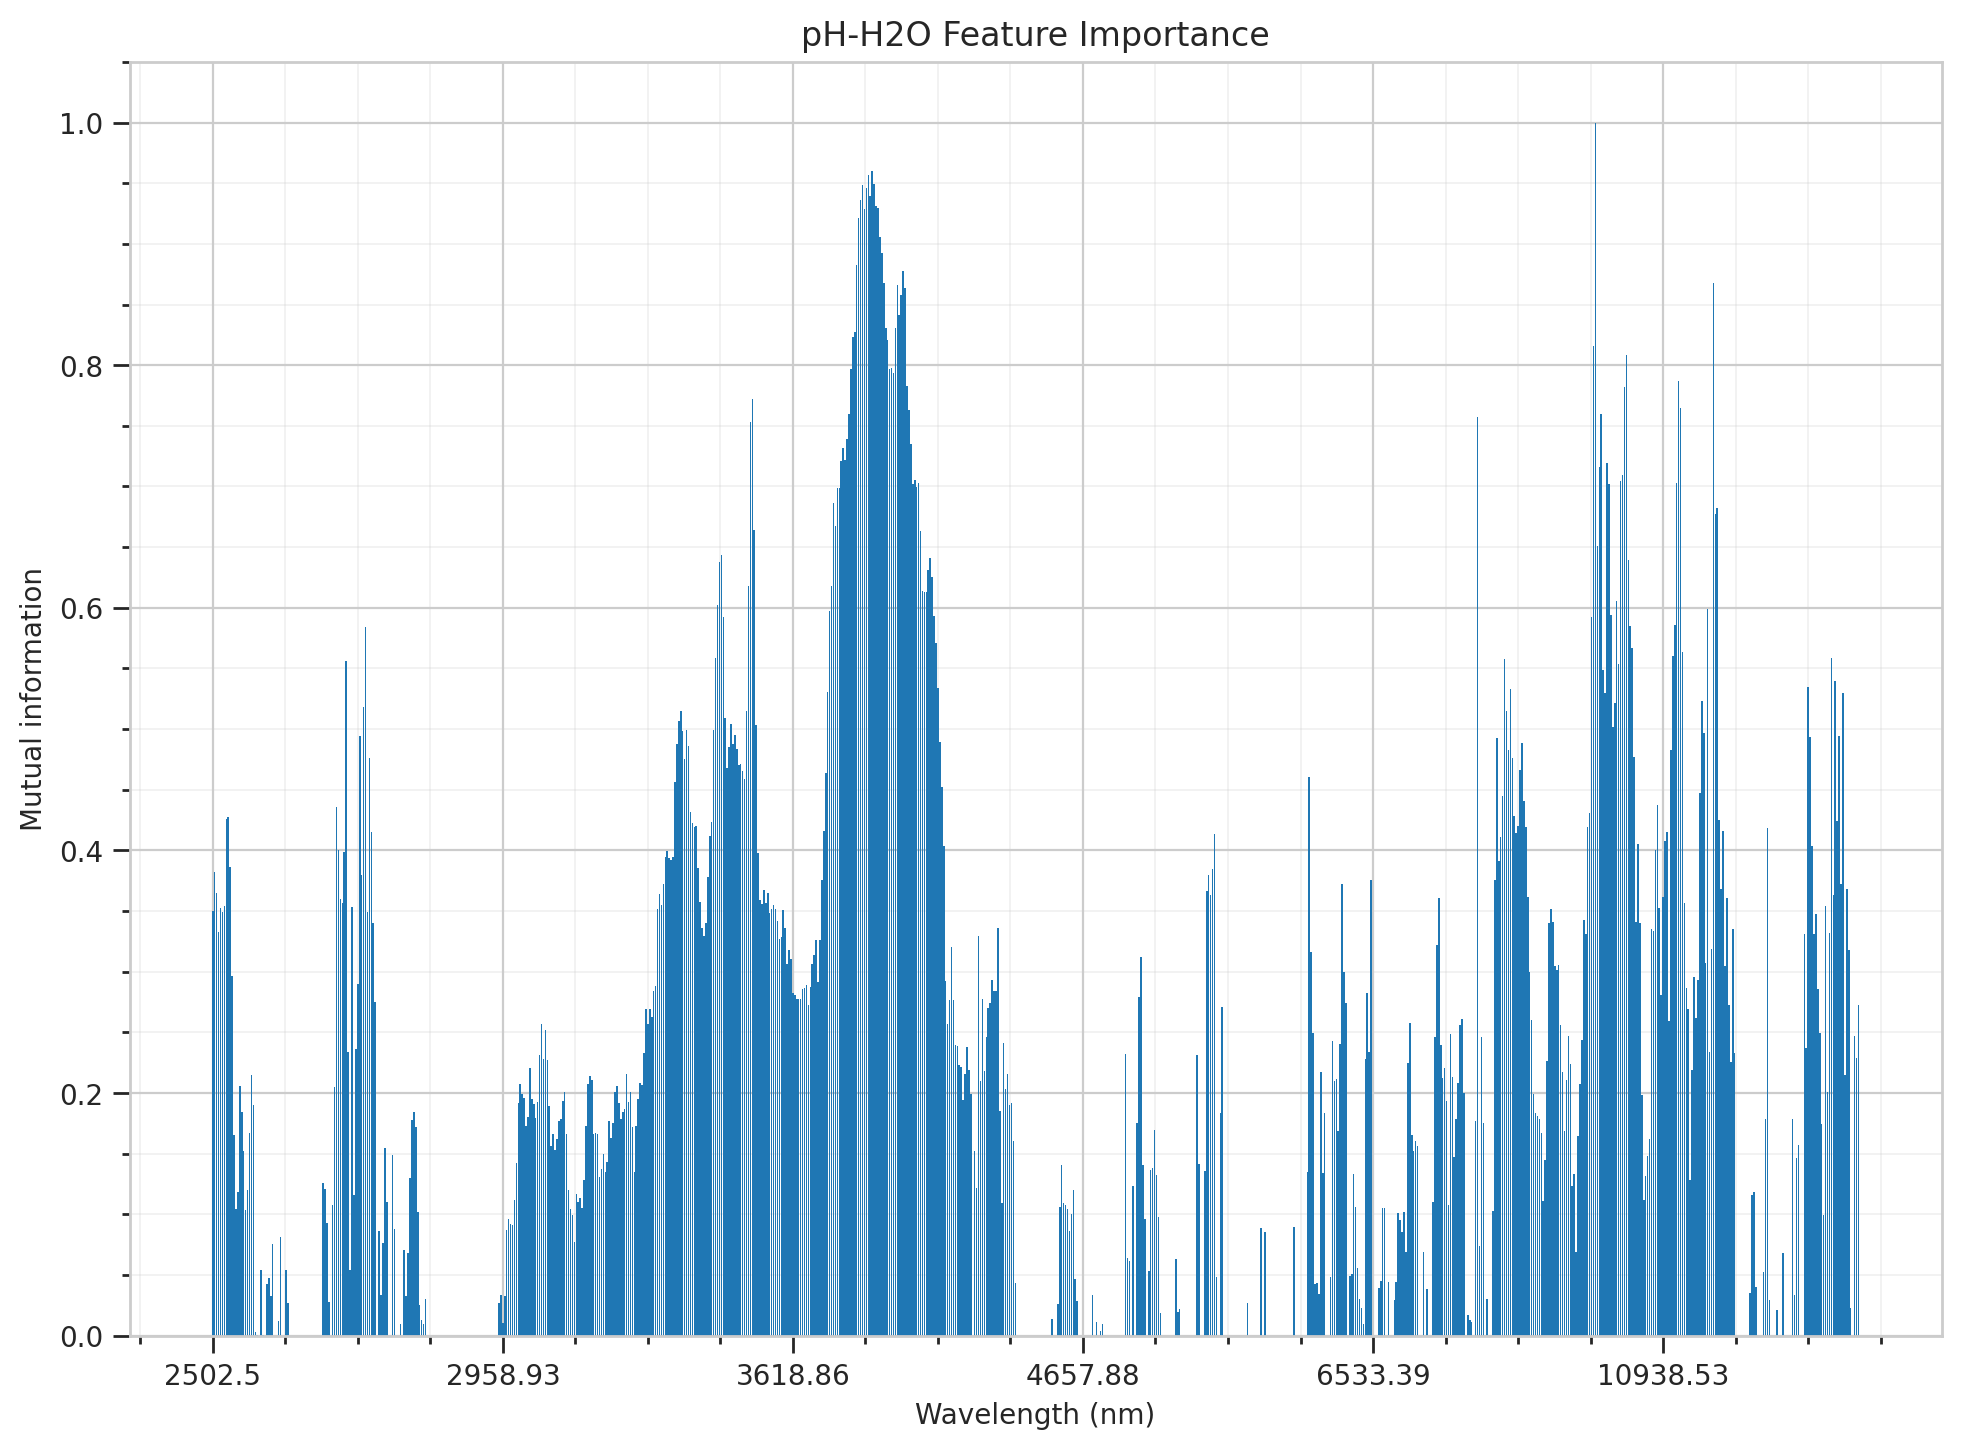

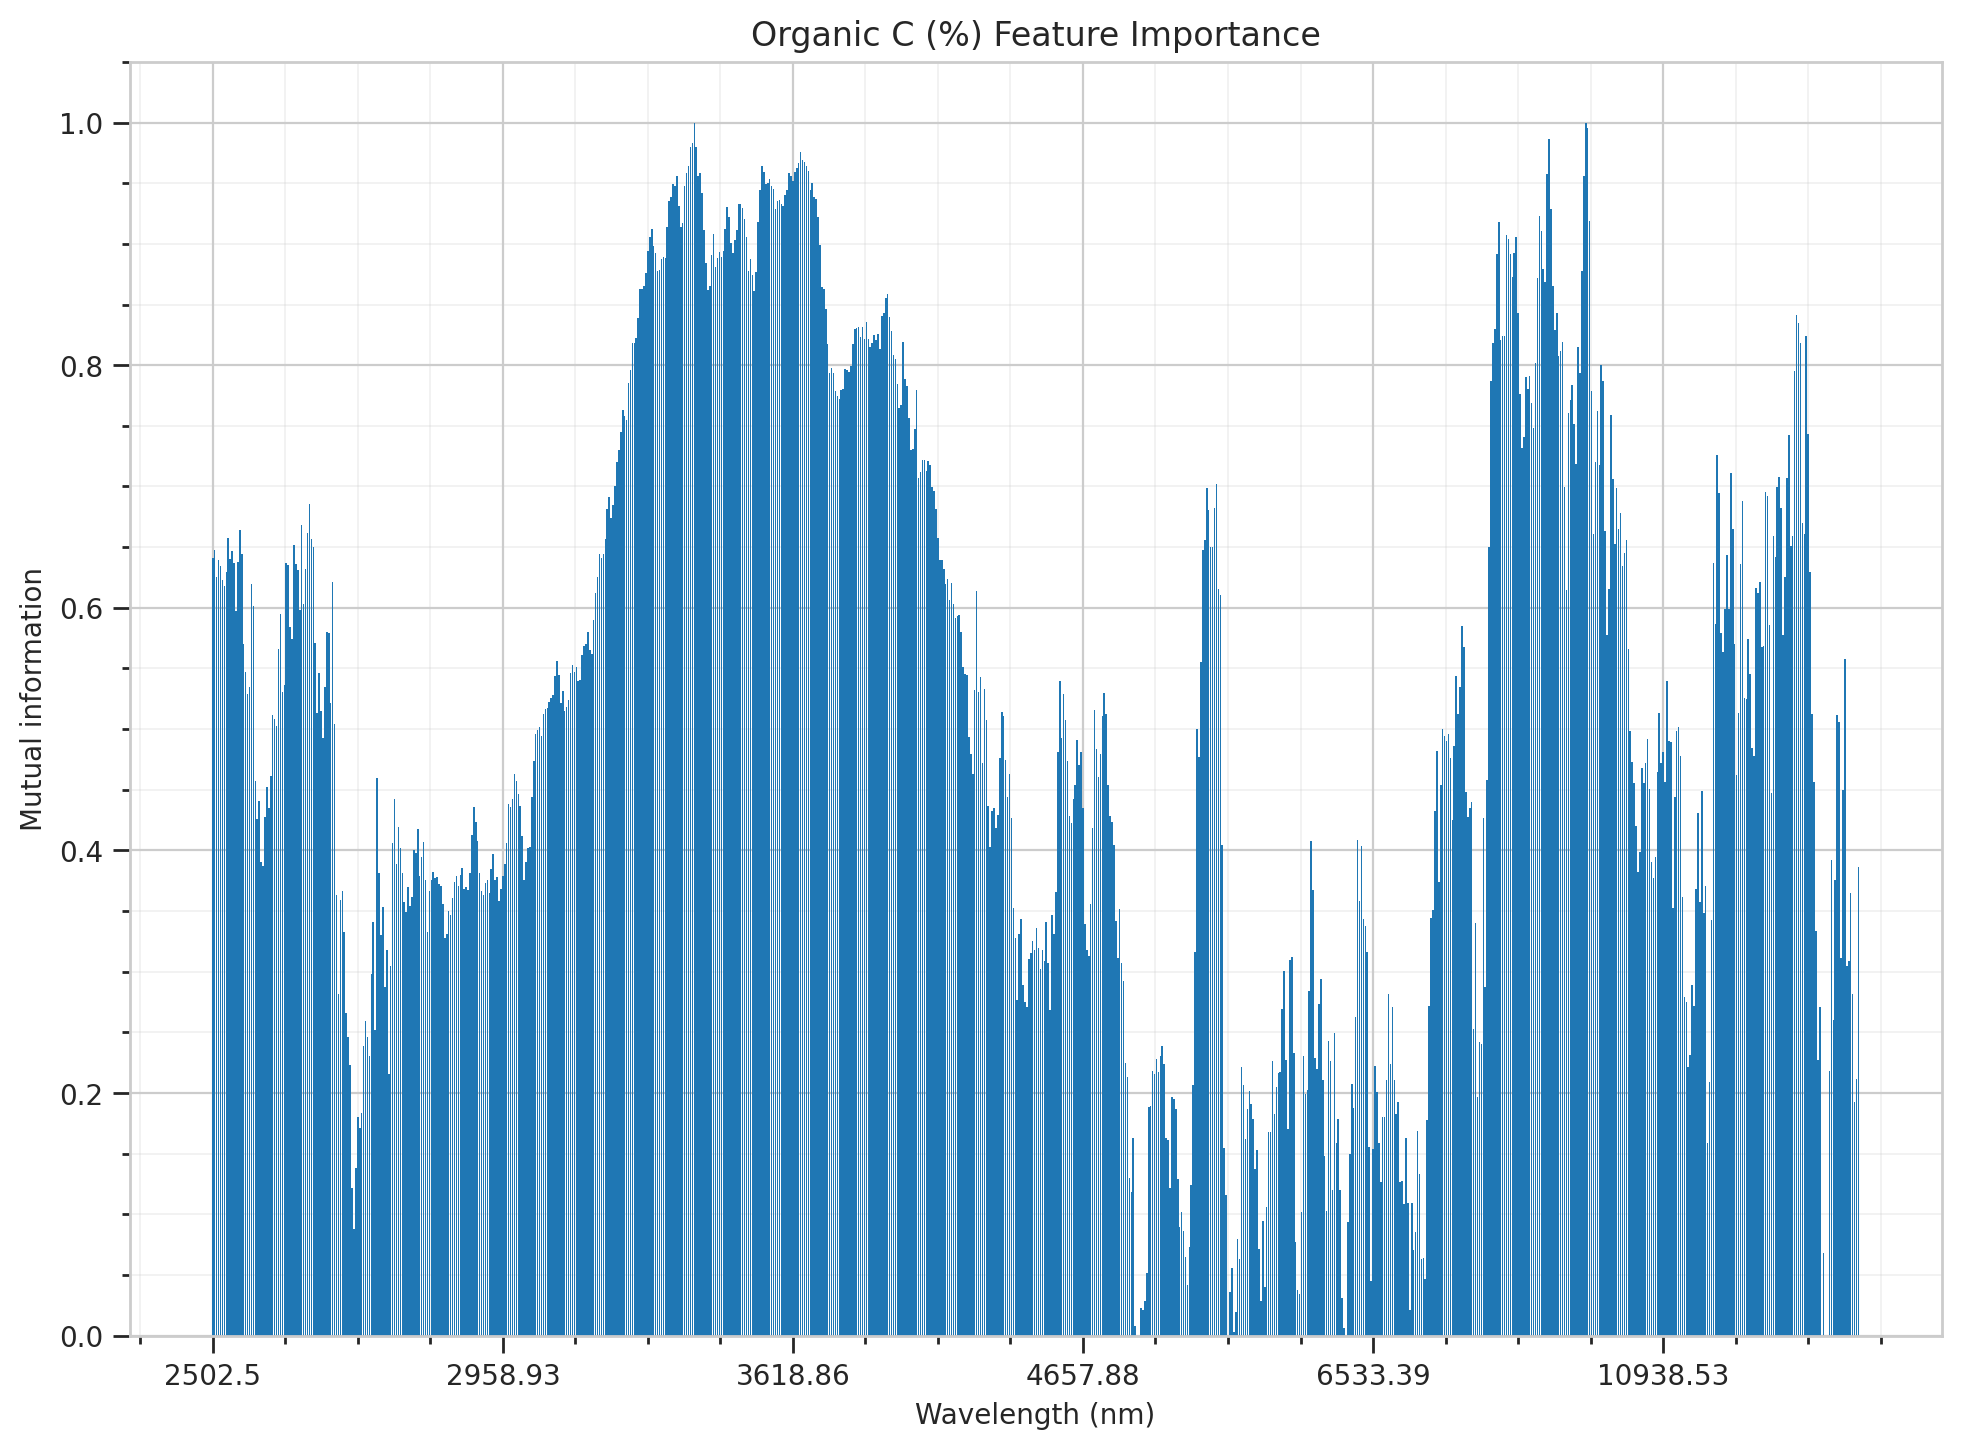

In [25]:
from spectraxai.explain import FeatureRanking

for p in properties:
    xai = PreHocAnalysis(datasets[p])
    axes = xai.bar_plot_importance(method=FeatureRanking.MI)
    axes[0].set_xlabel('Wavelength (nm)')
    axes[0].set_title(f'{p} Feature Importance')

The final step is to plot the spectrum according to quantiles of each property value.

/opt/tljh/user/envs/soils4africa/lib/python3.12/site-packages/spectraxai/explain.py:412: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(pandas.cut(dfs[j][y_name], y_ranges[i]))
/opt/tljh/user/envs/soils4africa/lib/python3.12/site-packages/spectraxai/explain.py:412: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(pandas.cut(dfs[j][y_name], y_ranges[i]))
/opt/tljh/user/envs/soils4africa/lib/python3.12/site-packages/spectraxai/explain.py:412: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current b

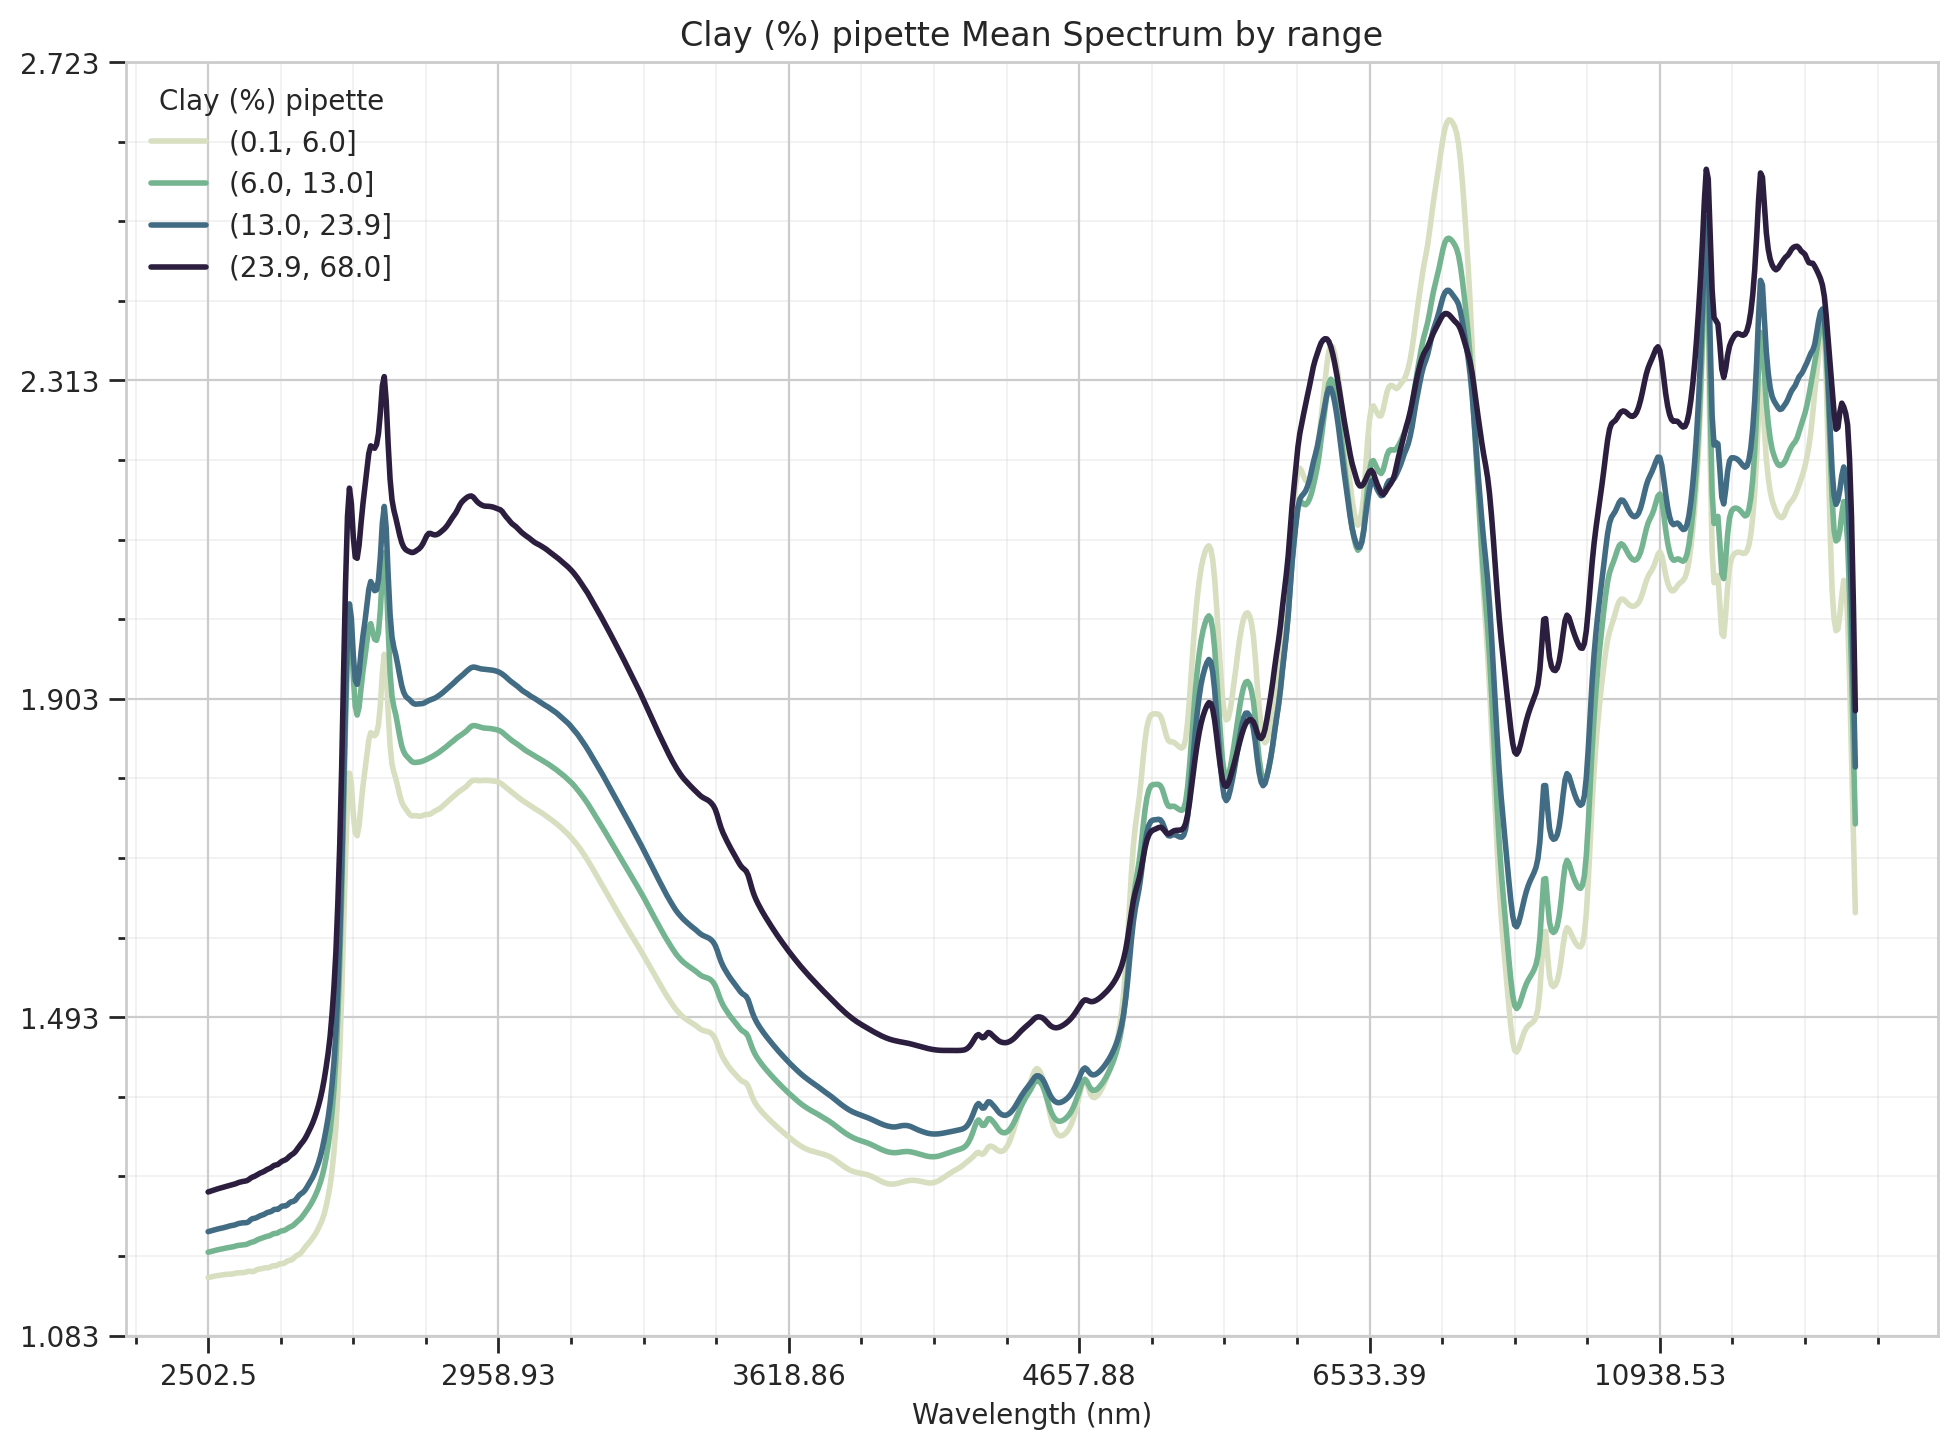

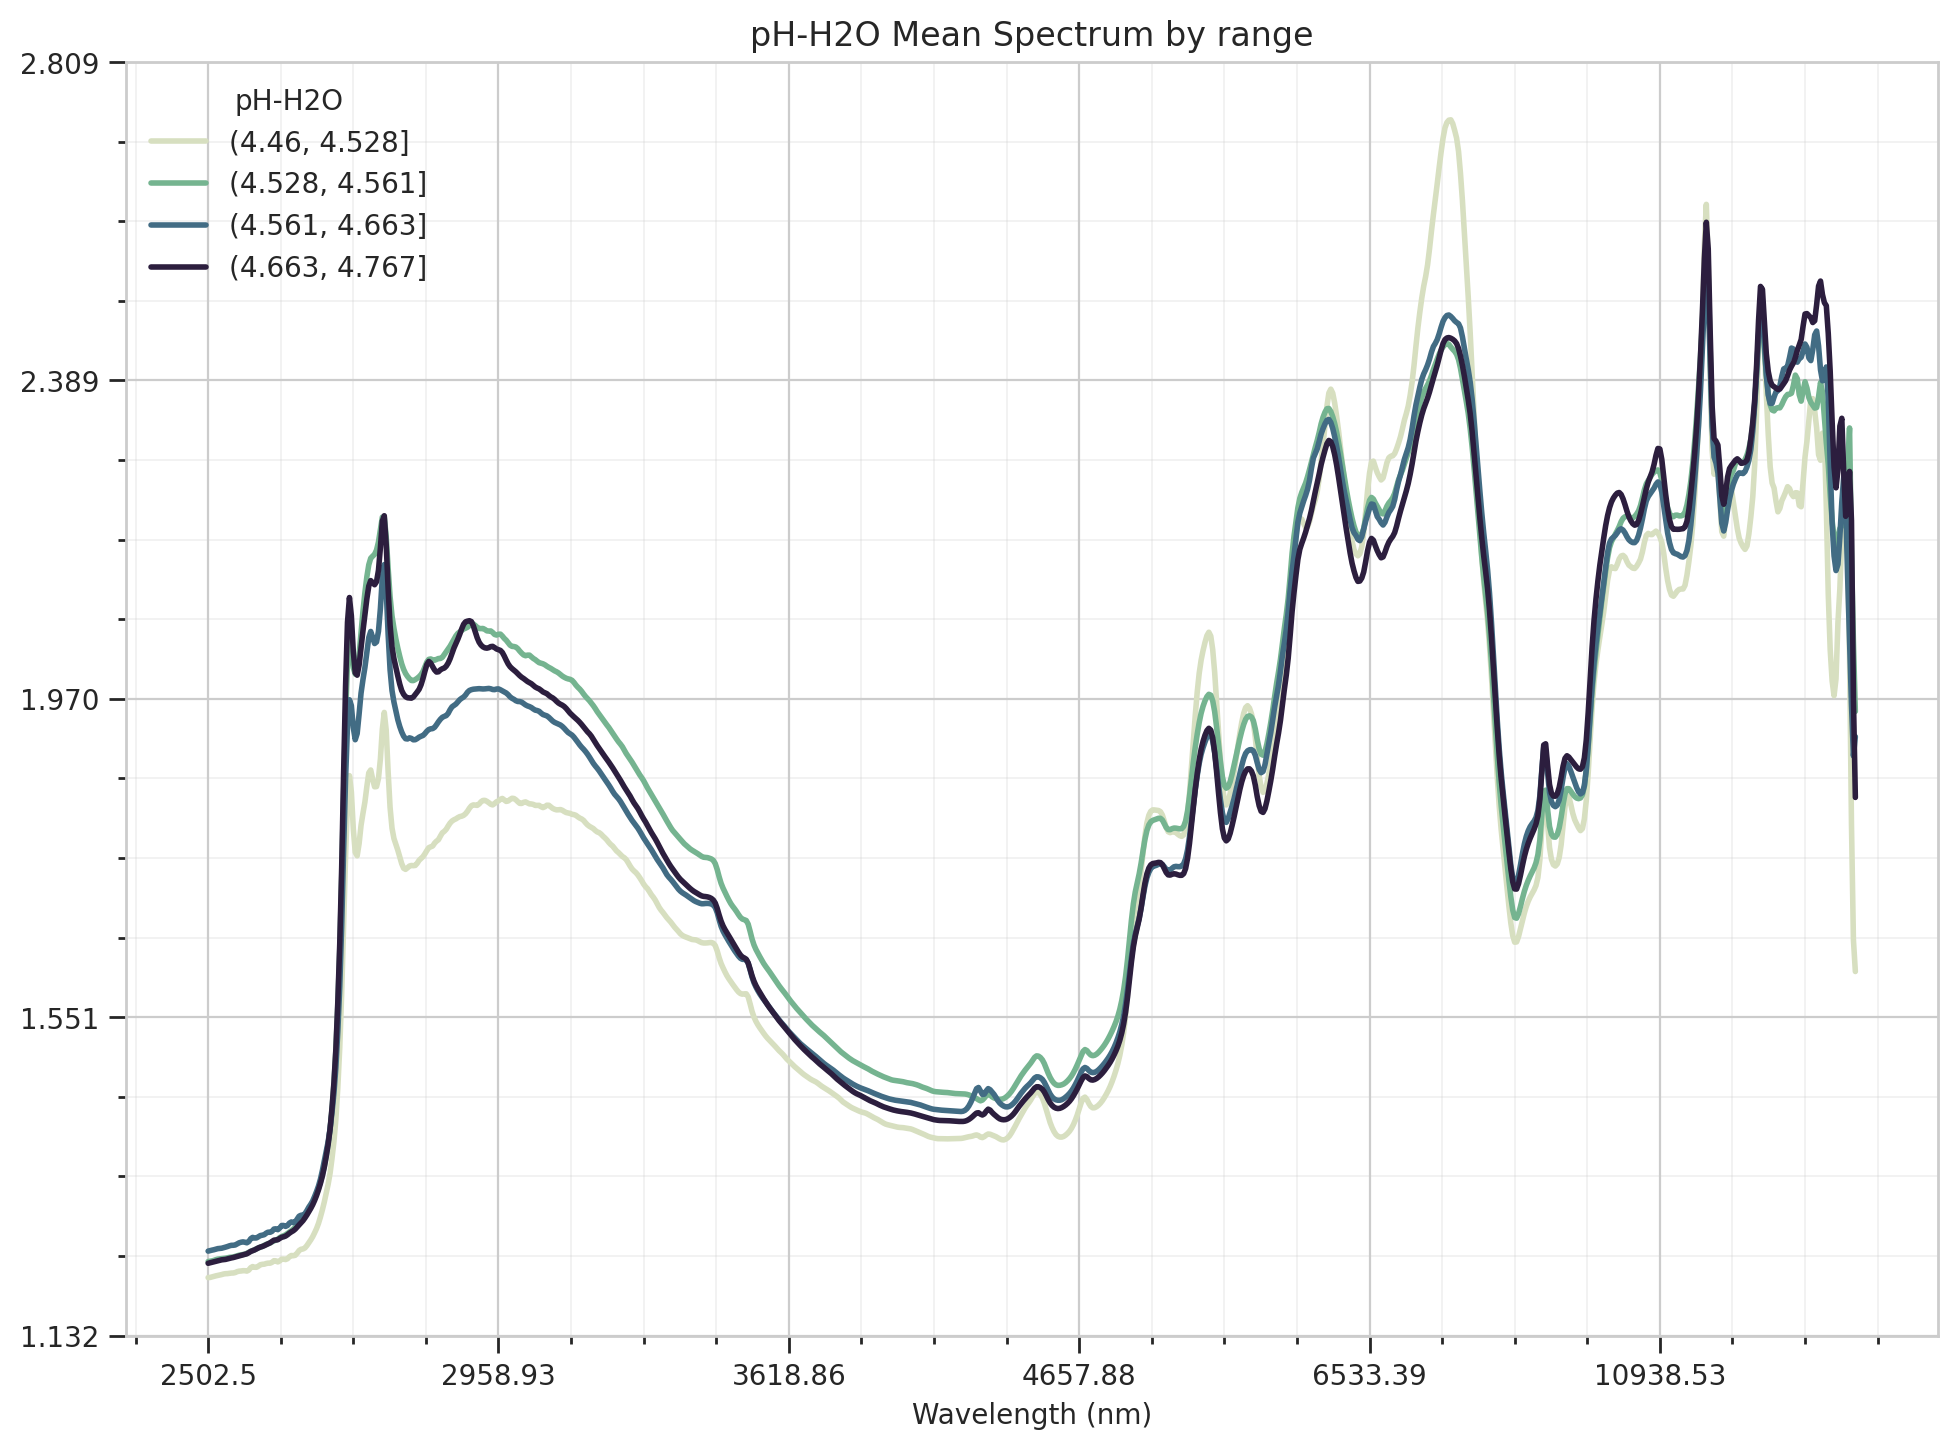

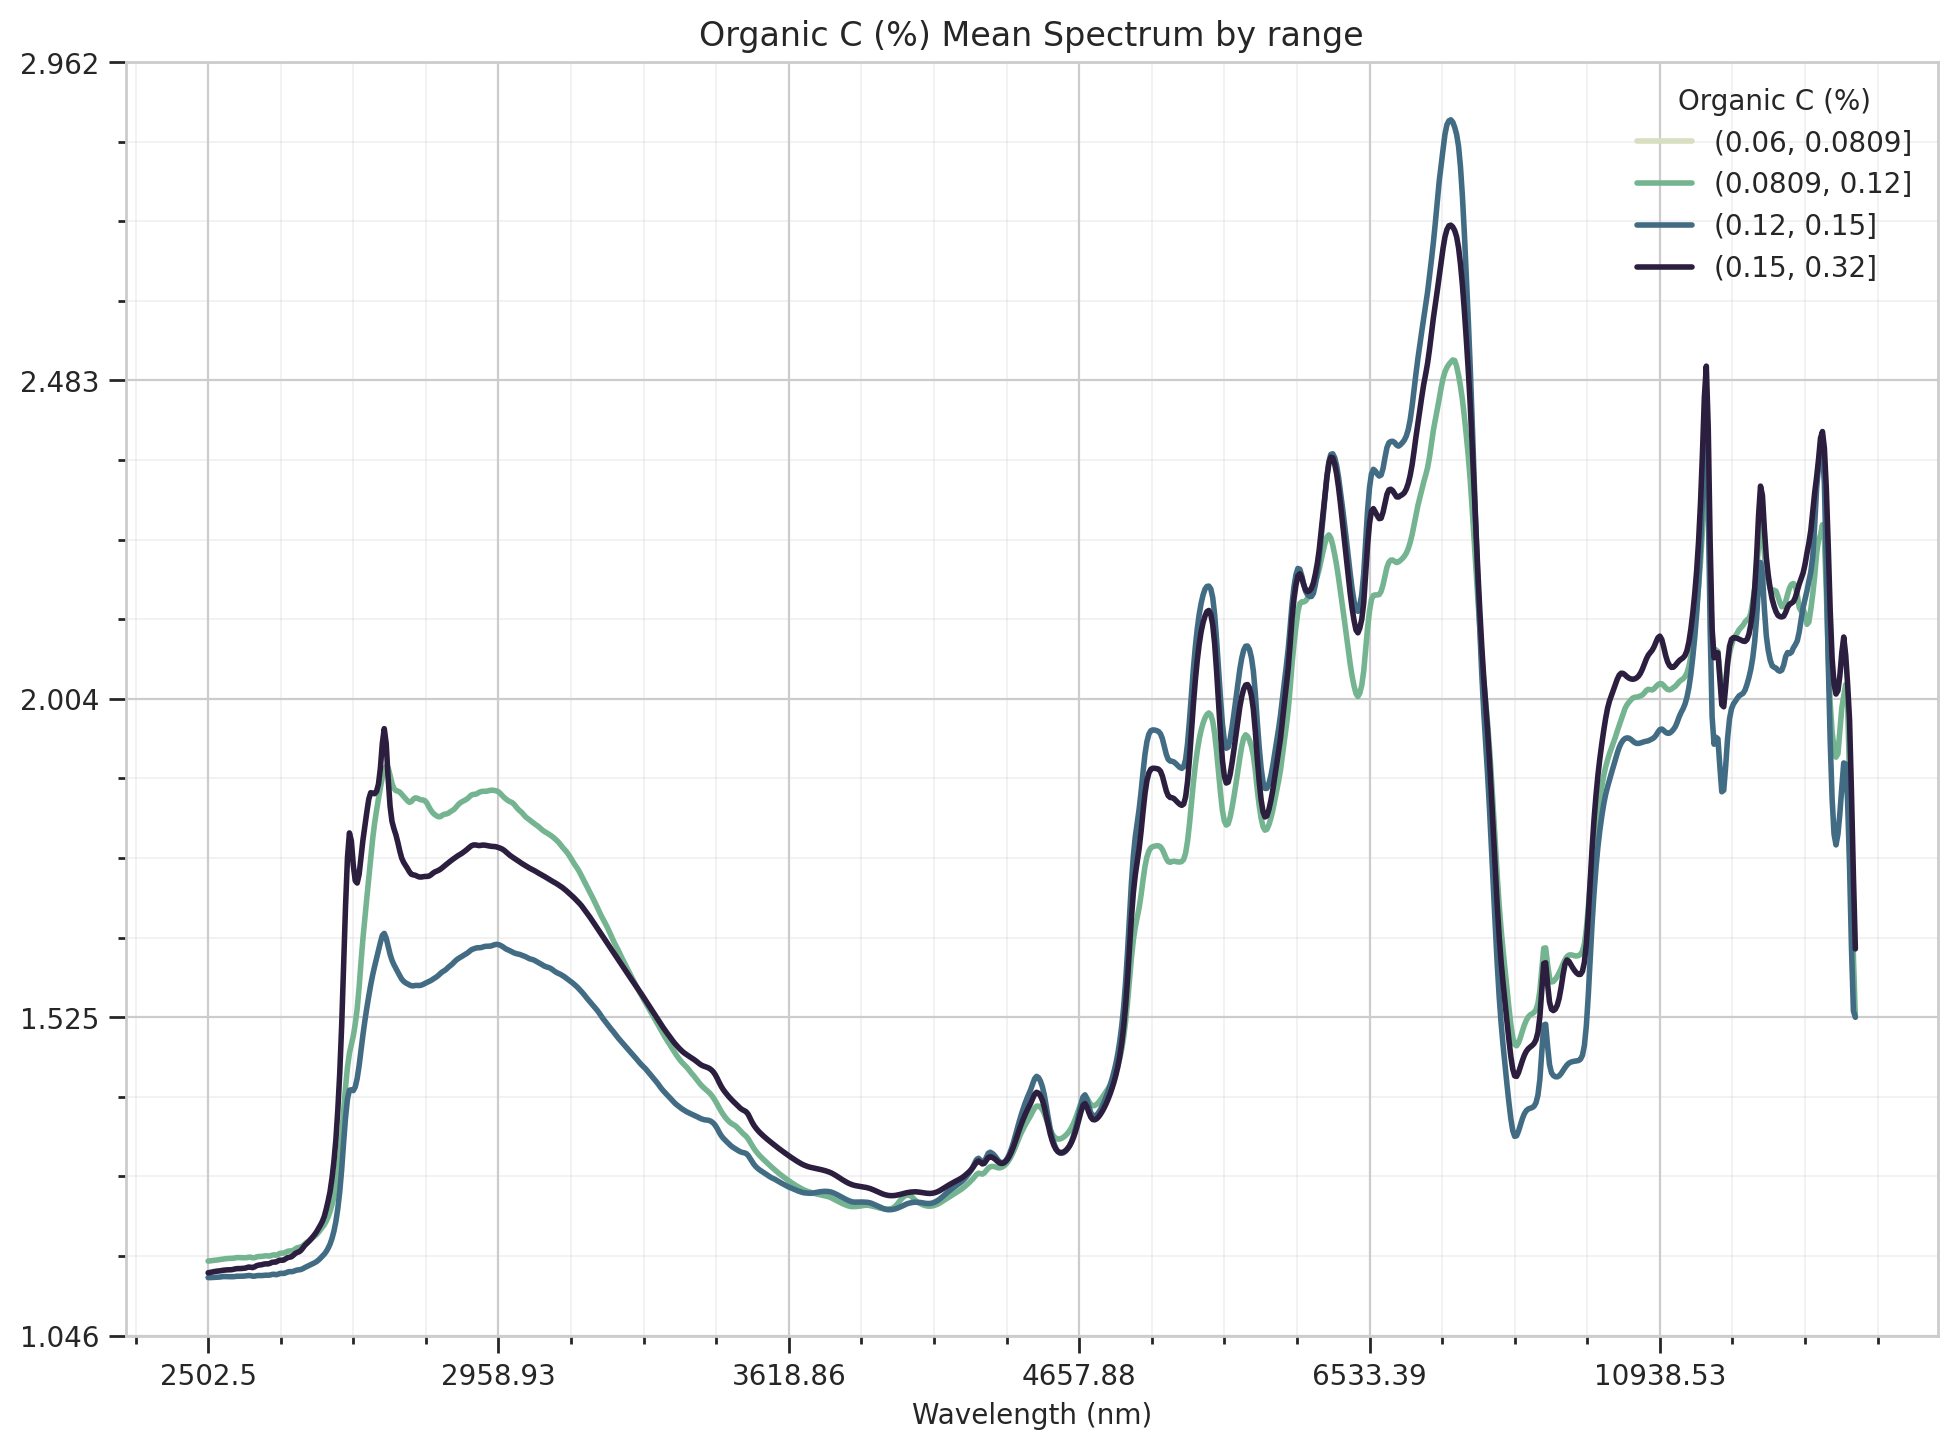

In [26]:
import numpy as np

if USE_FULL_PUBLIC_DATASET:
    ranges = {
        "Clay (%) pipette": [0, 25, 50, 75, 100],
        "Silt (%) pipette": [0, 25, 50, 75, 100],
        "Sand (%) pipette": [0, 25, 50, 75, 100],
        "pH-H2O": [4, 5, 6, 7, 9],
        "Total C (%)": [0, 0.25, 0.75, 1.5, 10],
    }
else:
    ranges = {
        "Clay (%) pipette": [0, 25, 50, 75, 100],
        "pH-H2O": [4, 5, 6, 7, 9],
        "Organic C (%)": [0, 0.25, 0.75, 1.5, 10],
    }

for p in properties:
    axes = PreHocAnalysis(datasets[p]).mean_spectrum_by_range(
        y_ranges=[
            np.percentile(datasets[p].Y.squeeze(), ranges[p])
        ],
        preprocesses=[
            SpectralPreprocessing.NONE
        ]
    )
    axes[0,0].legend(title=f'{p}')
    axes[0,0].set_title(f'{p} Mean Spectrum by range')
    axes[0,0].set_xlabel('Wavelength (nm)')

### Post Hoc Analysis

In this part trained models will be used to demonstrate the feature importance post modelling. In other words, we will visualize what each model sees to model the input <-> output relationship.

#### Random Forest

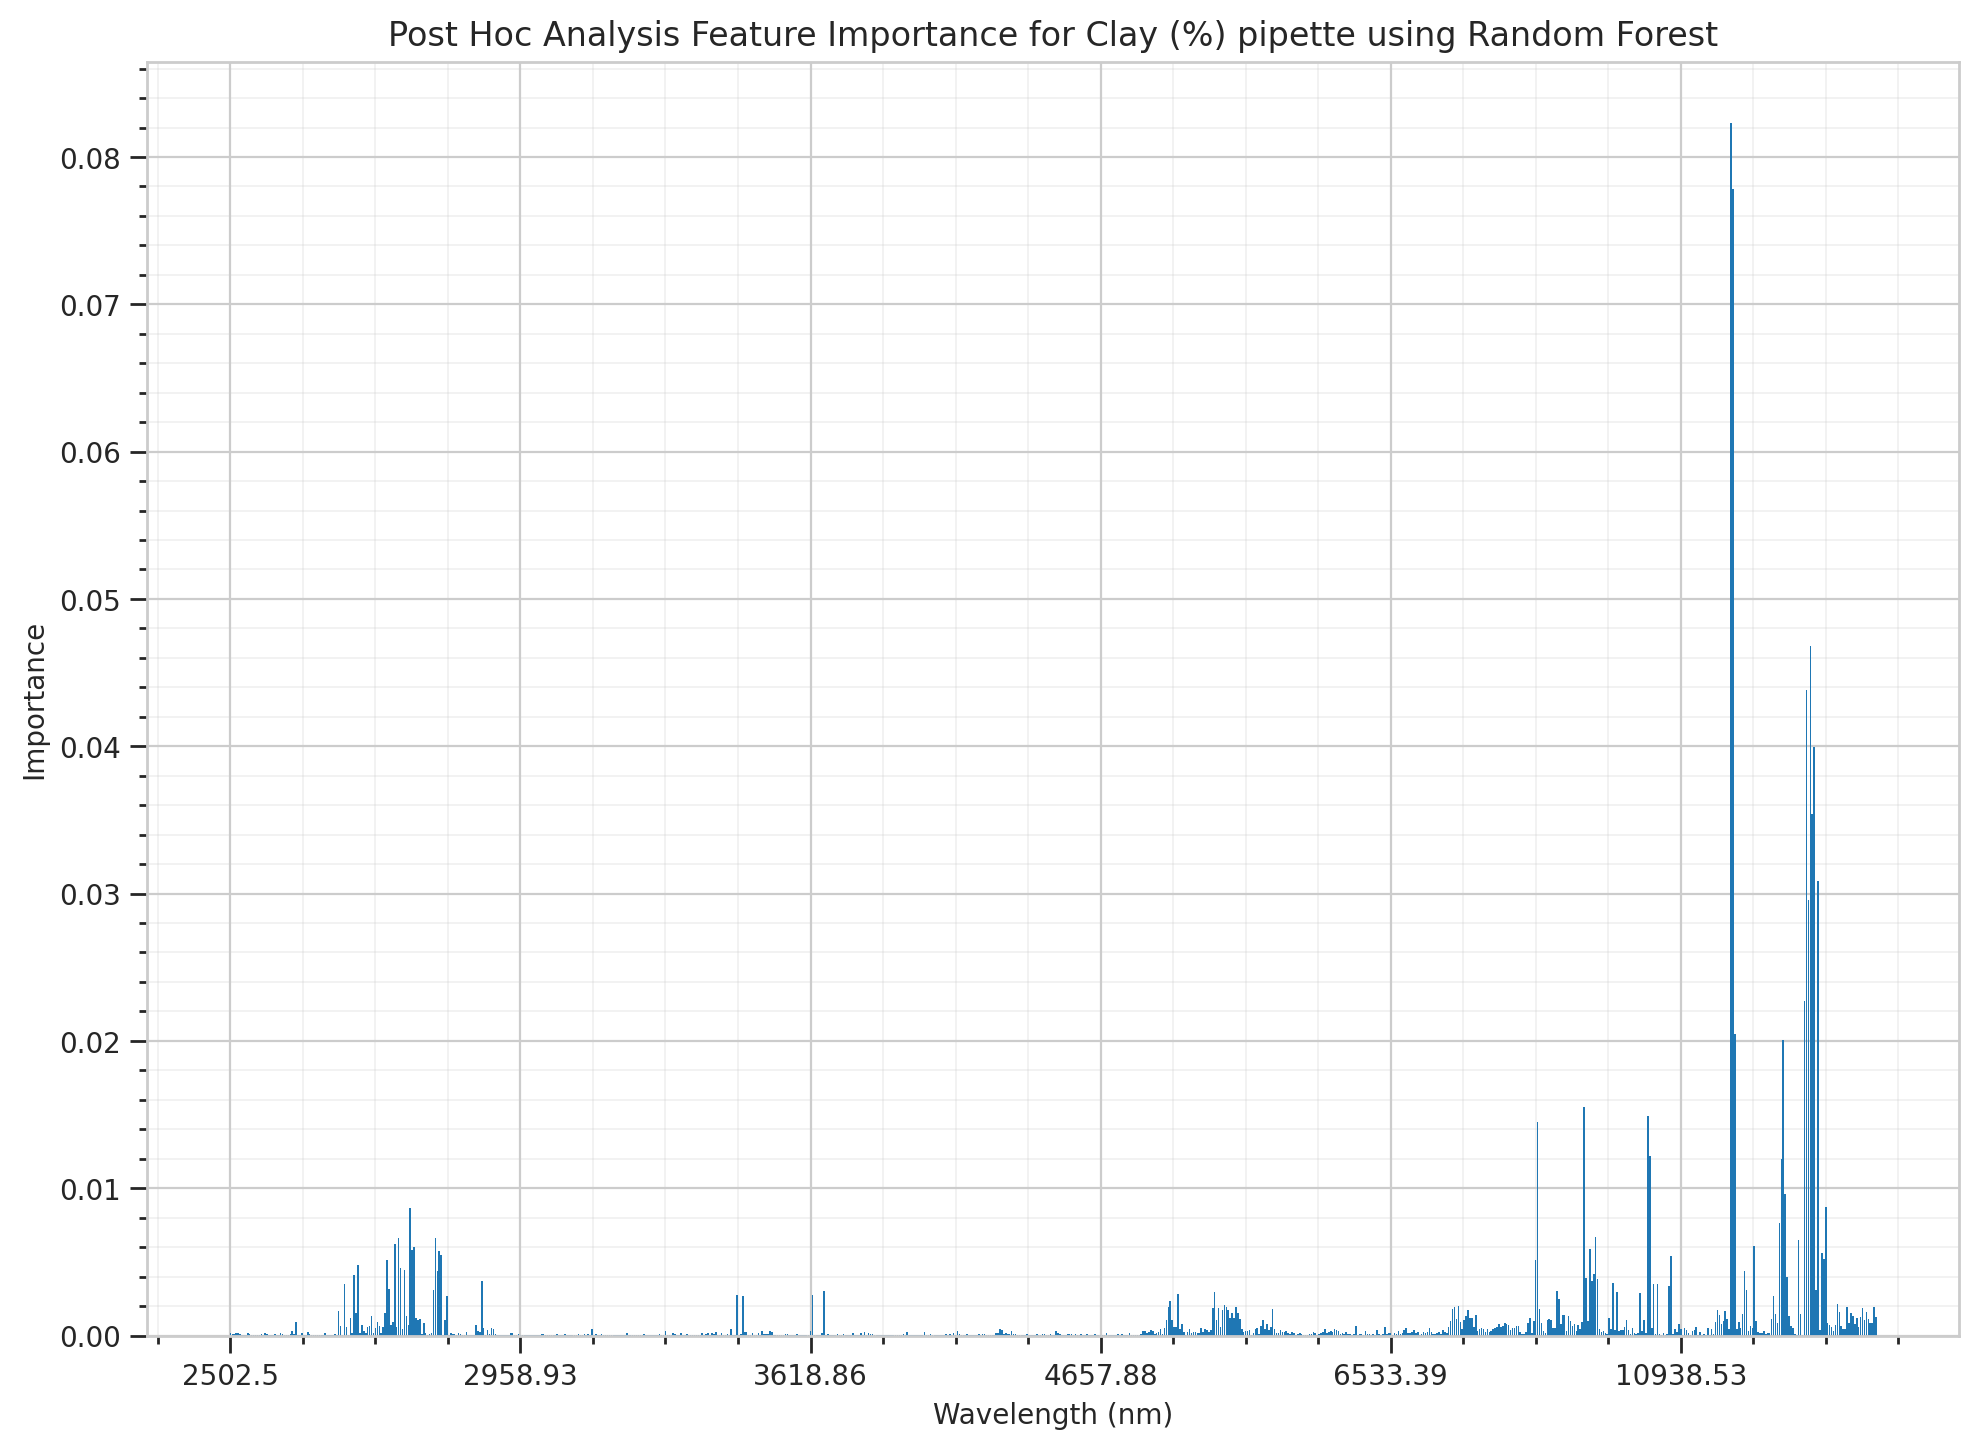

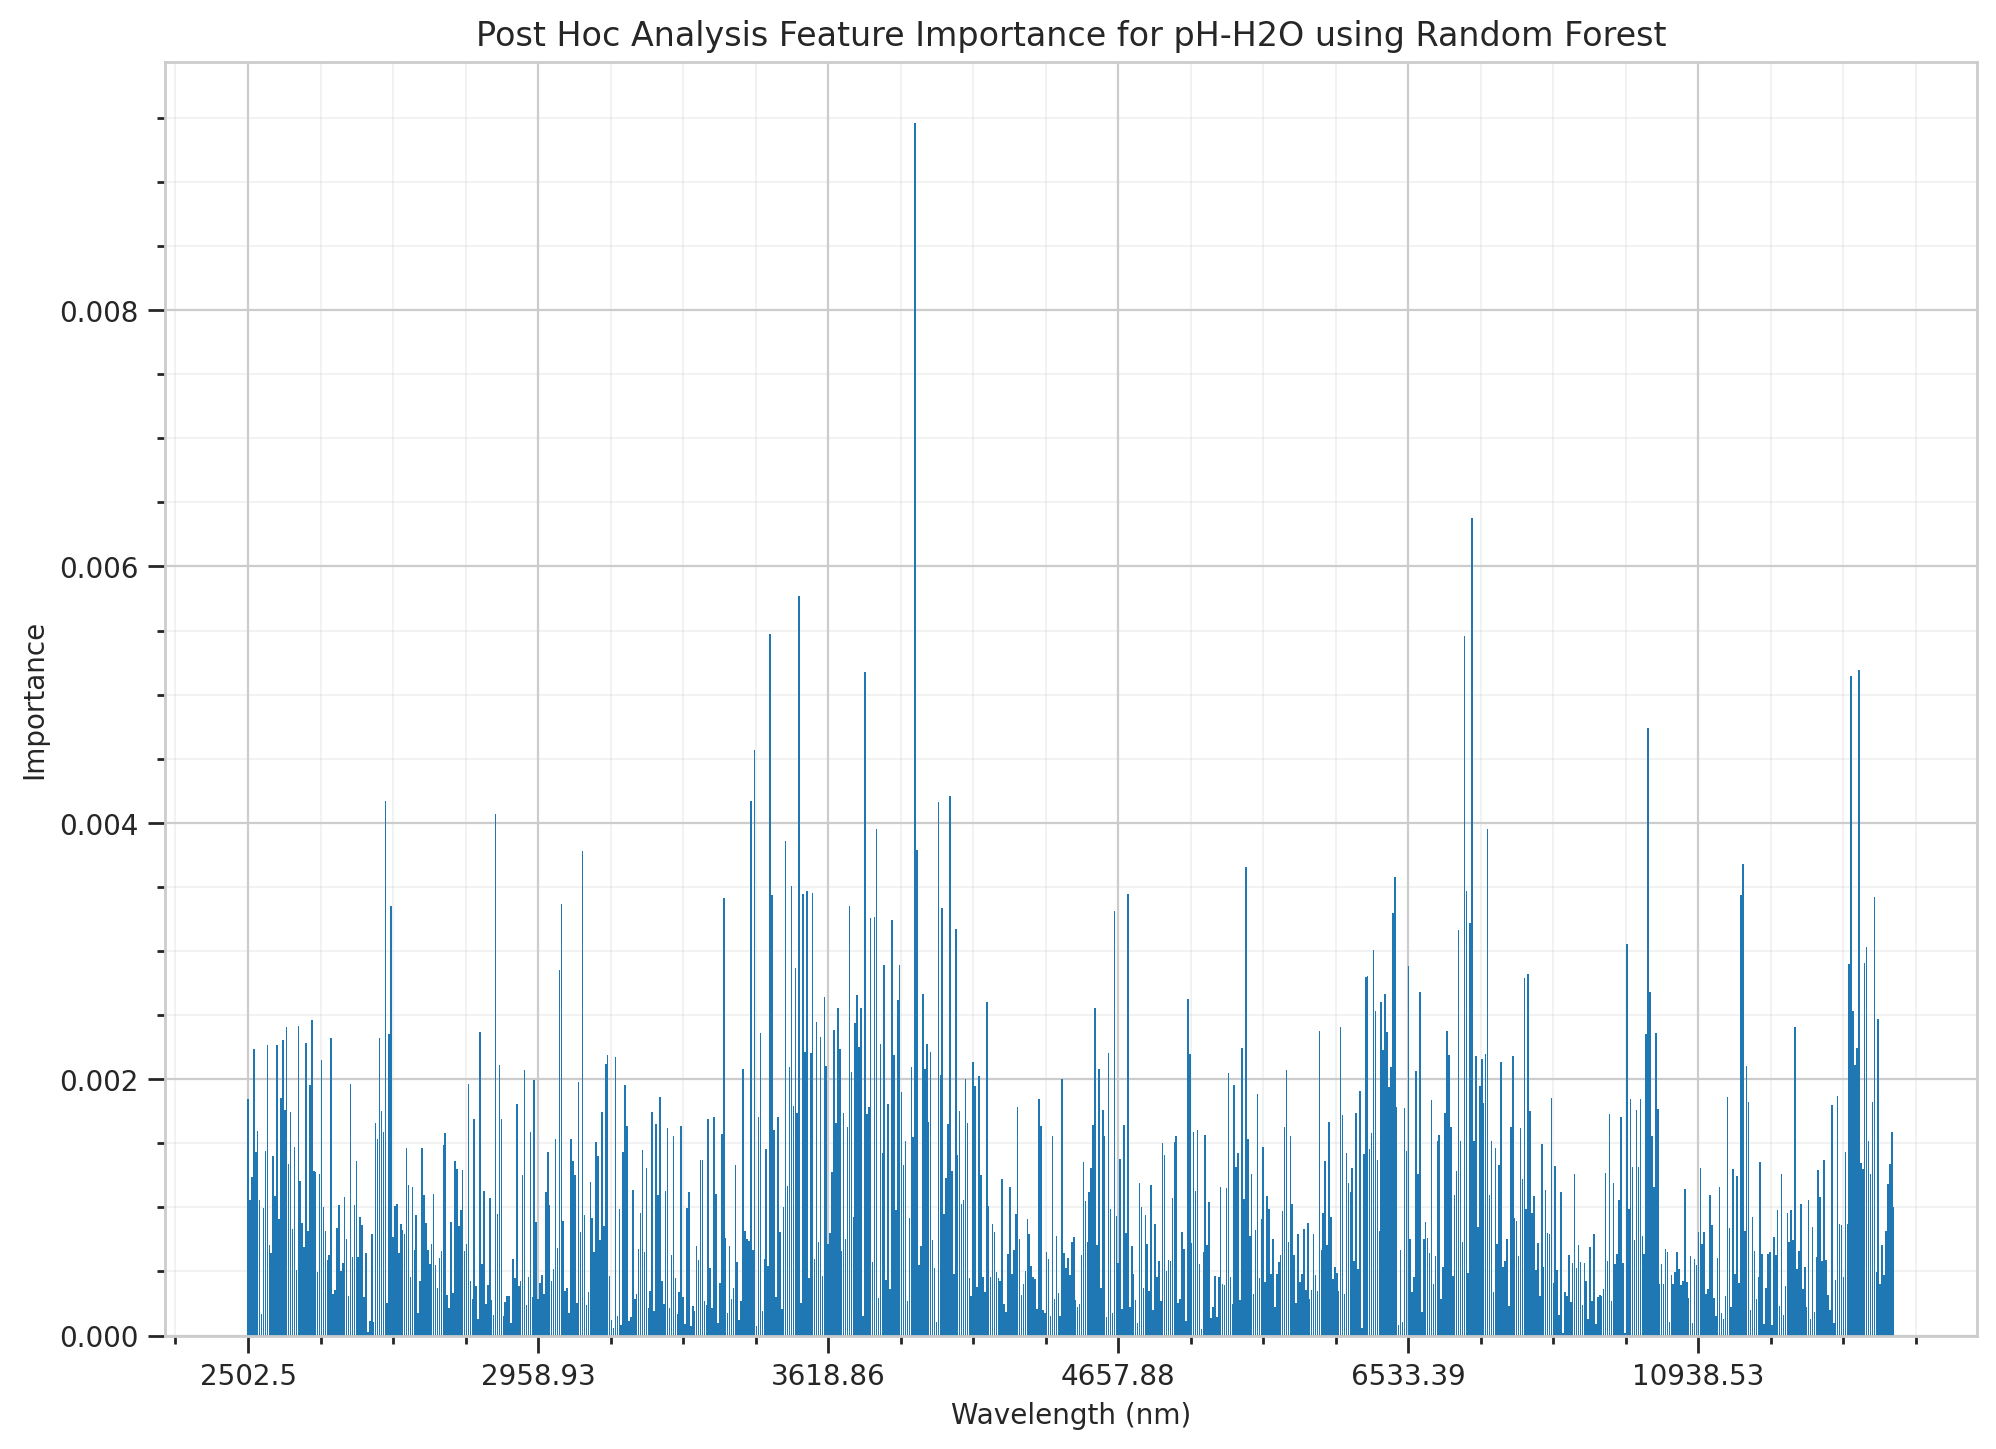

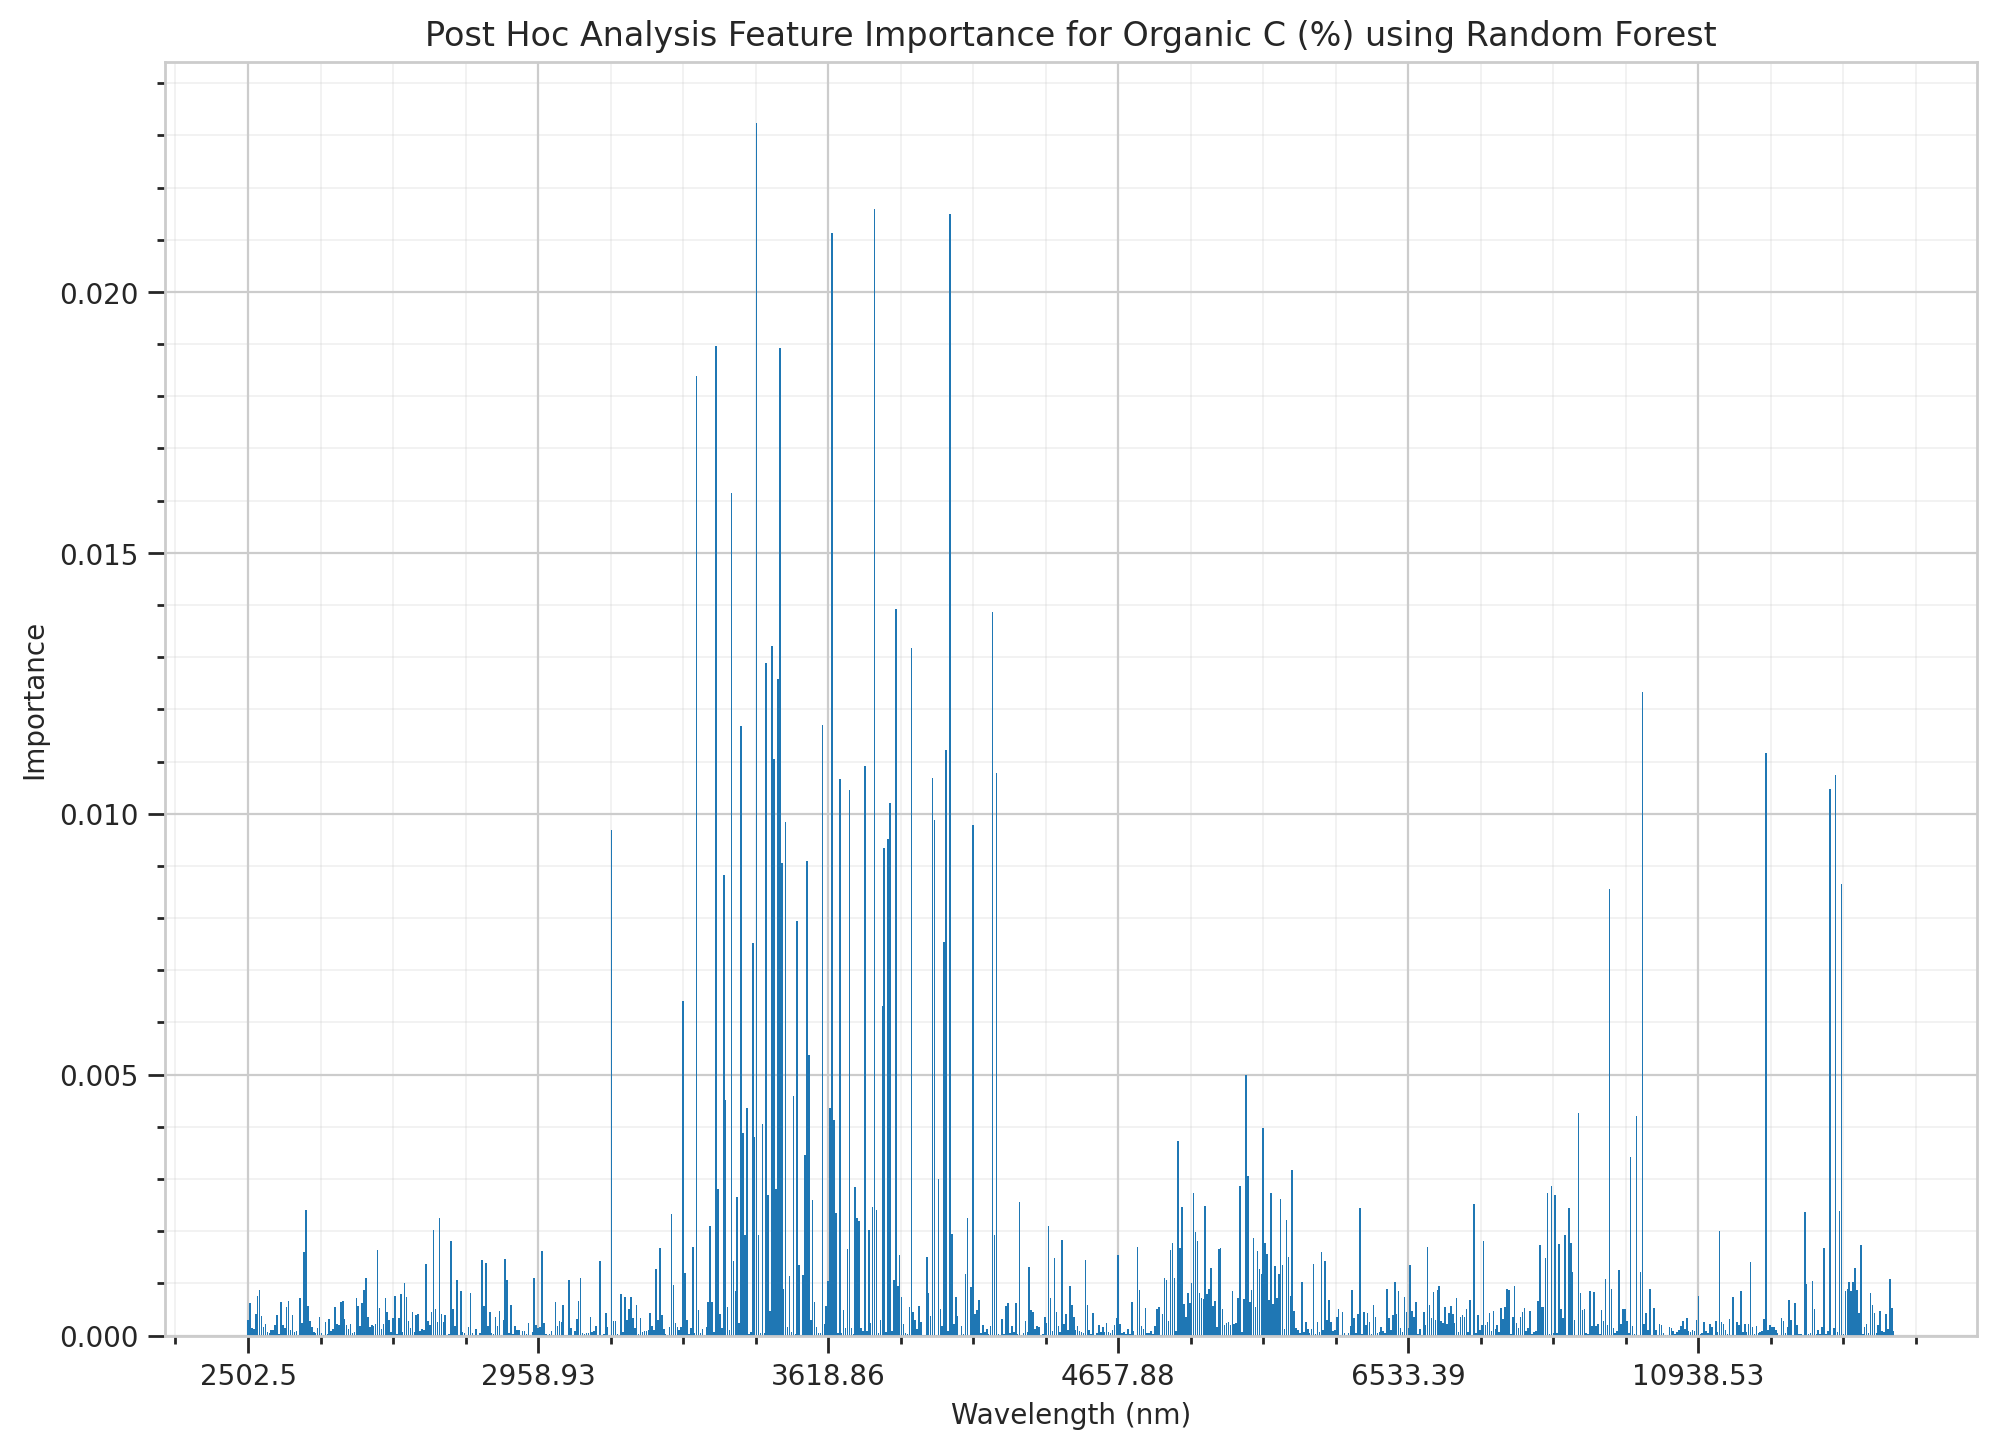

In [27]:
from spectraxai.explain import PostHocAnalysis

for p in properties:
    model = StandardModel(Model.RF)
    res = model.fit_and_predict(datasets[p], idx_trn=splits[p][0], get_model=True)
    xai = PostHocAnalysis(datasets[p])
    ax = xai.bar_plot_importance(res.iloc[0]["feature_importance"])
    ax.set_title(f'Post Hoc Analysis Feature Importance for {p} using Random Forest')
    ax.set_xlabel('Wavelength (nm)')

#### Partial Least Squares

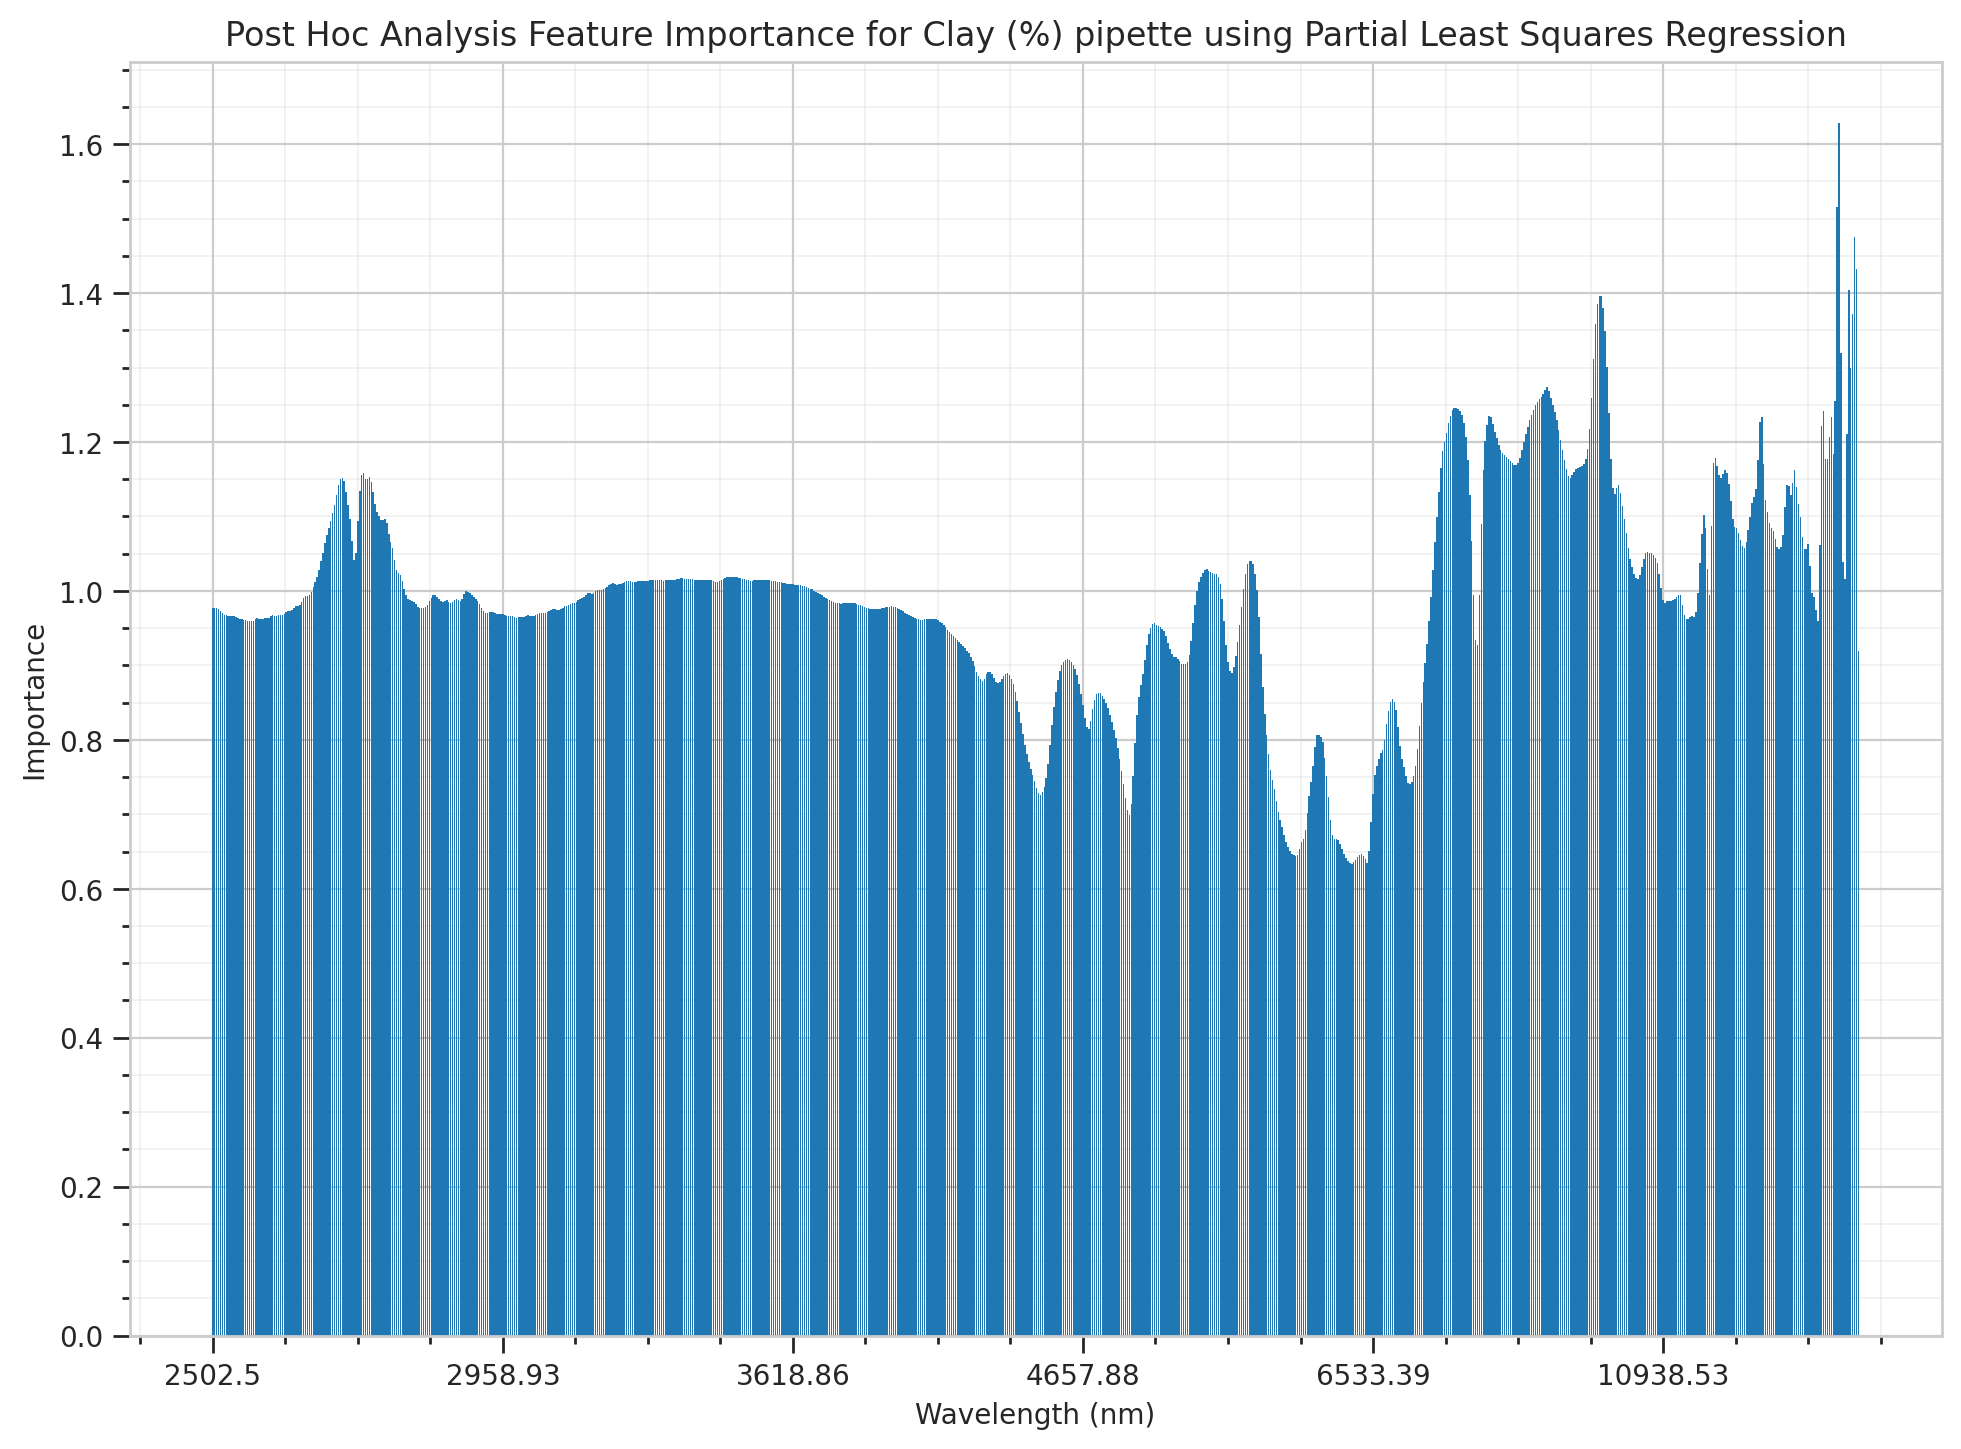

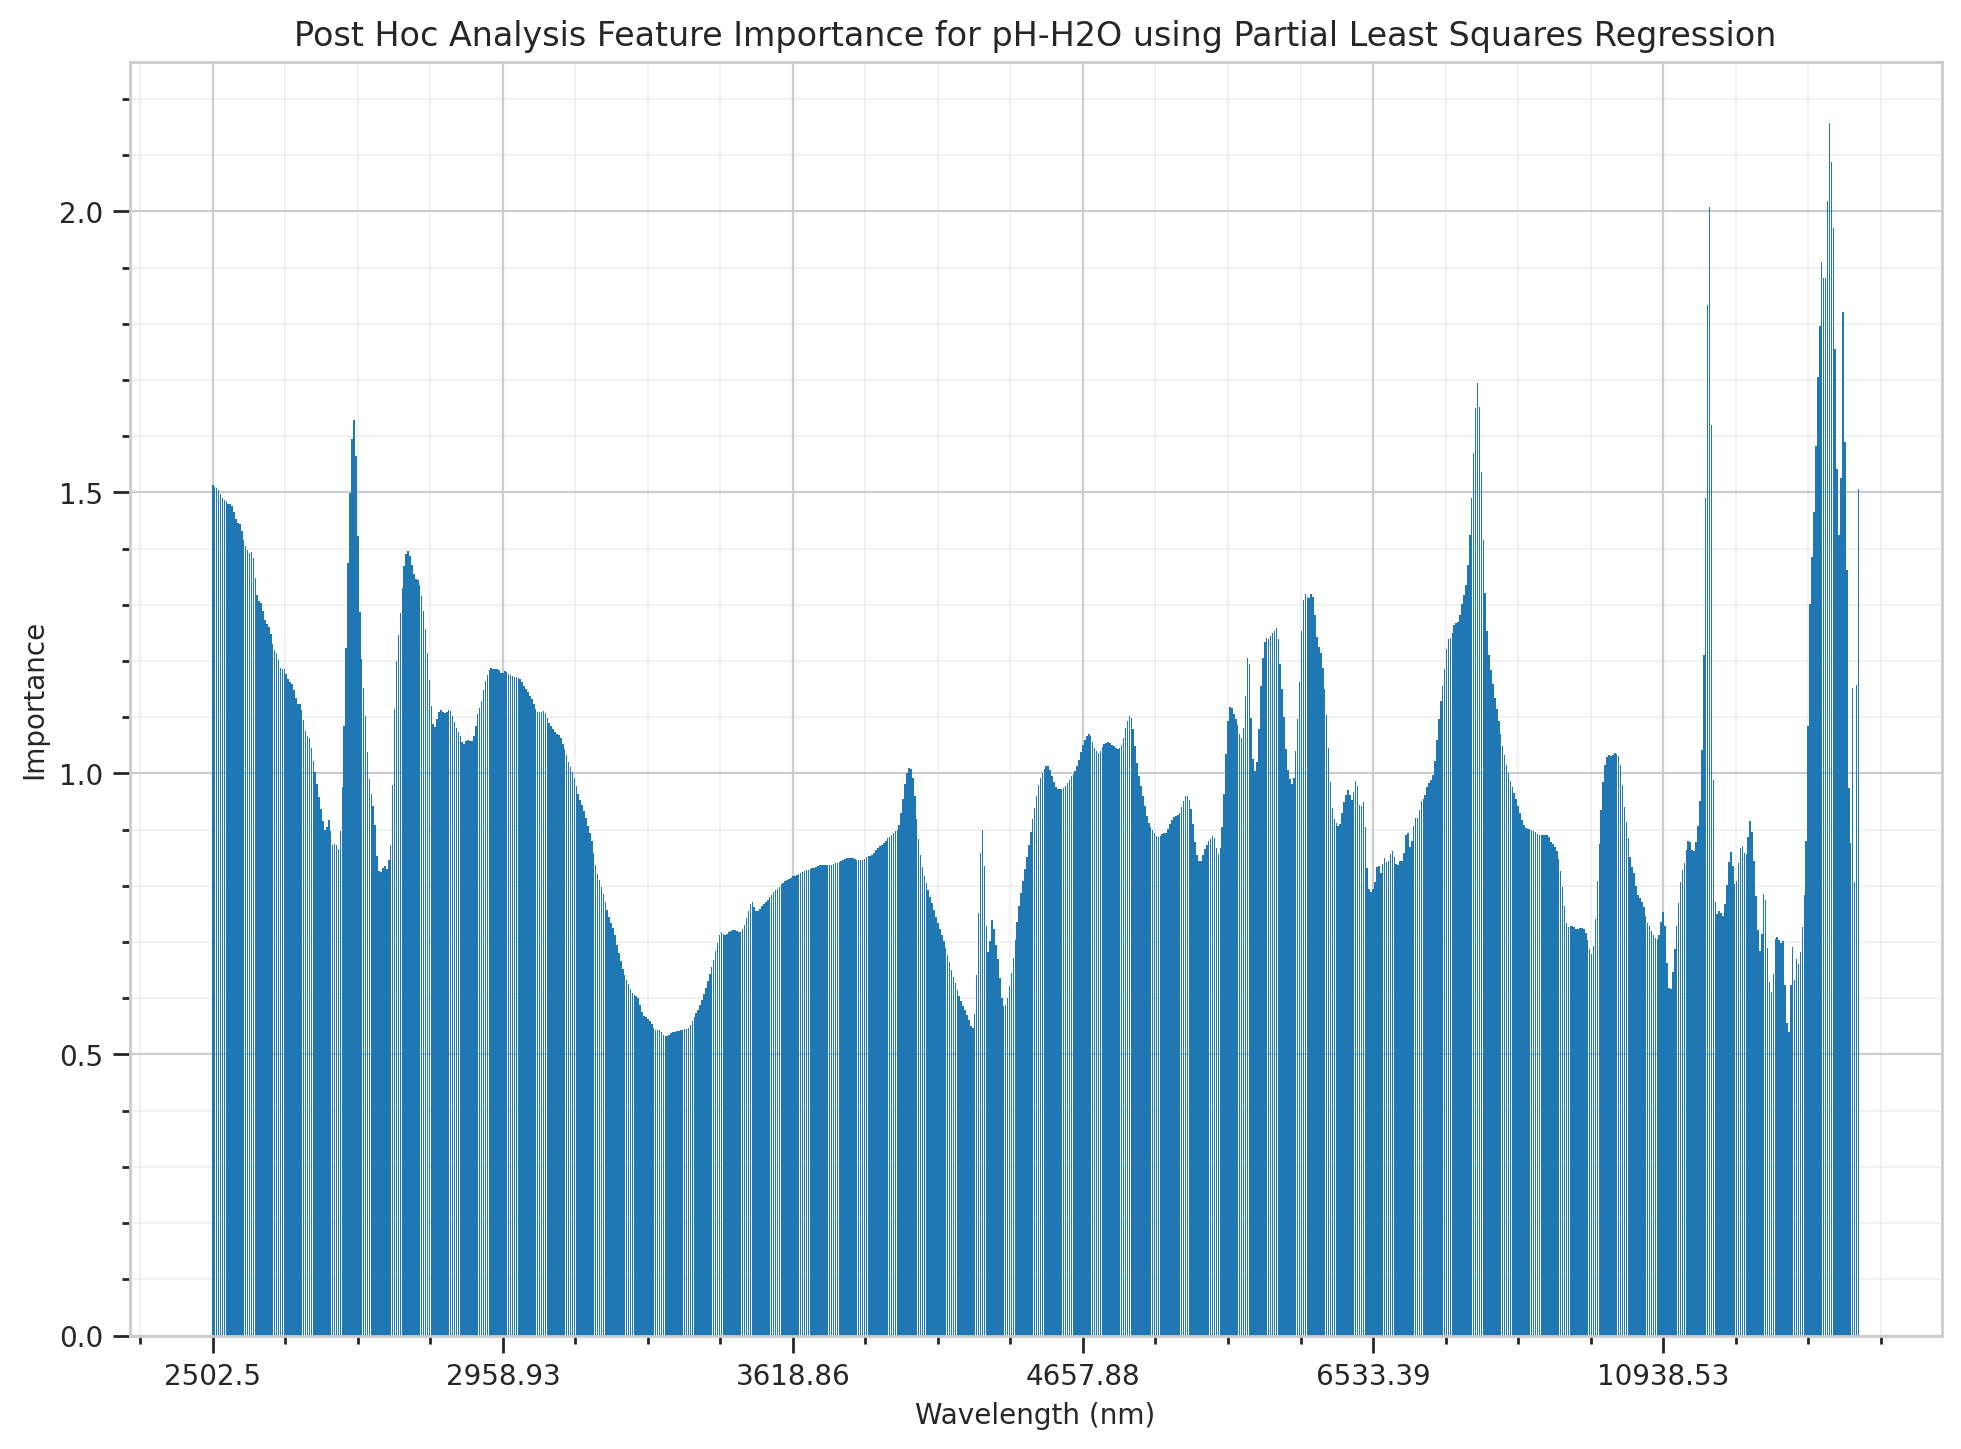

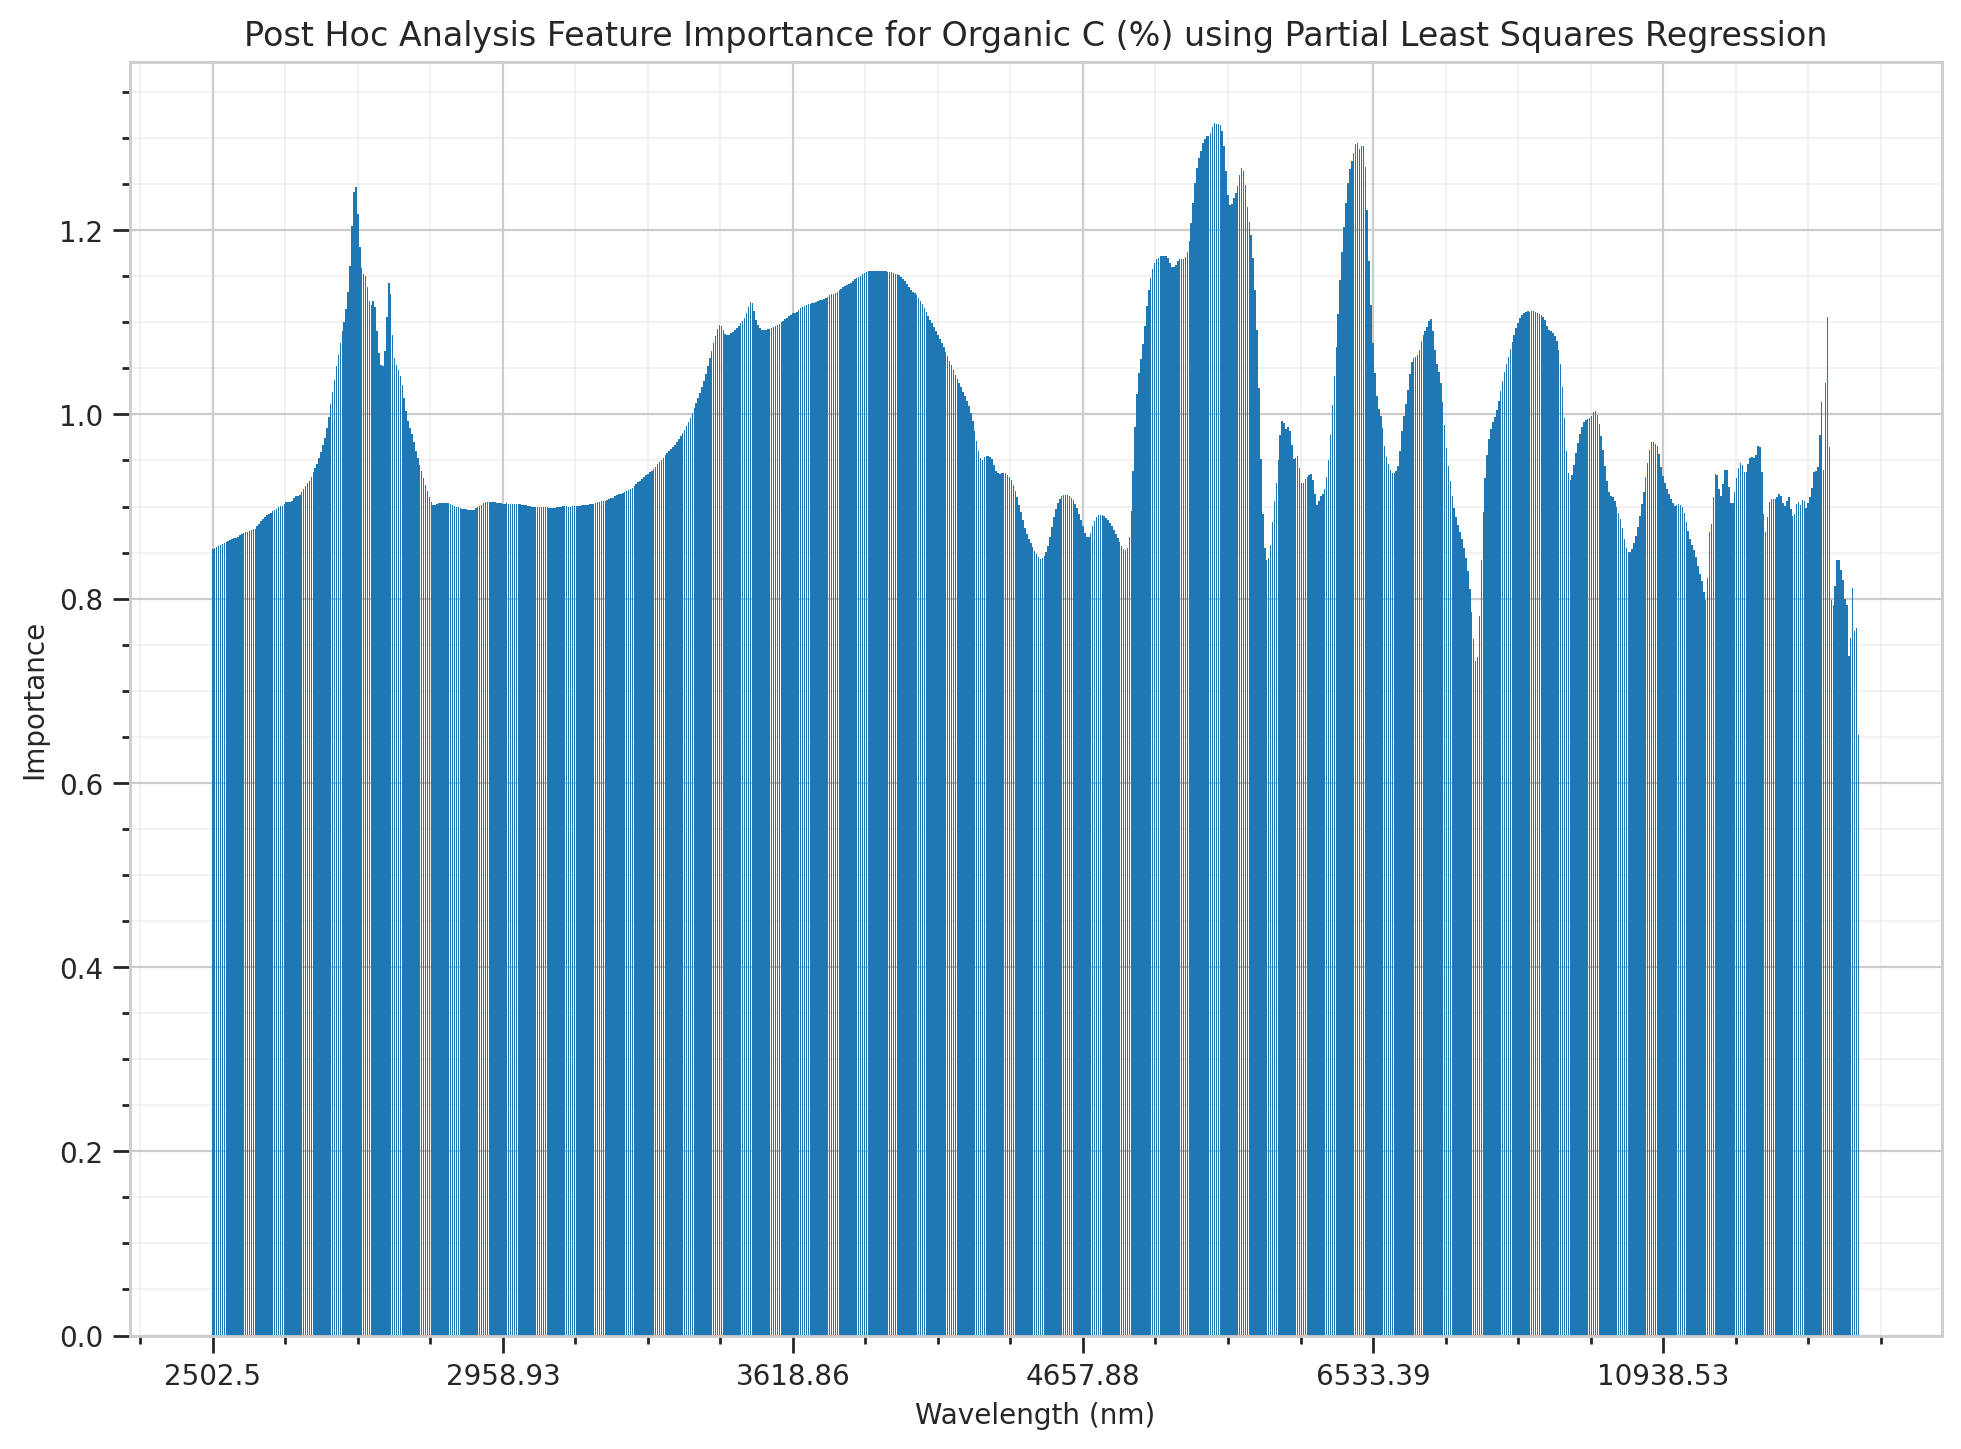

In [28]:
from spectraxai.explain import PostHocAnalysis

for p in properties:
    model = StandardModel(Model.PLS)
    res = model.fit_and_predict(datasets[p], idx_trn=splits[p][0], get_model=True)
    xai = PostHocAnalysis(datasets[p])
    ax = xai.bar_plot_importance(res.iloc[0]["feature_importance"])
    ax.set_title(f'Post Hoc Analysis Feature Importance for {p} using Partial Least Squares Regression')
    ax.set_xlabel('Wavelength (nm)')